In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import missingno as msno

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as shc

from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score

from sklearn.cluster import AffinityPropagation

In [3]:
File_Path = os.path.join(os.getcwd(), 'Mall_Customers.csv')
df = pd.read_csv(File_Path)
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
df.tail()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

In [5]:
df.sample(5)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
131         132    Male   39                  71                      75
33           34    Male   18                  33                      92
168         169  Female   36                  87                      27
54           55  Female   50                  43                      45
95           96    Male   24                  60                      52

In [6]:
df.shape

(200, 5)

In [7]:
df.columns.str.lower().str.strip().str.replace(' ', '_')

Index(['customerid', 'genre', 'age', 'annual_income_(k$)',
       'spending_score_(1-100)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [10]:
df.rename(columns={'Genre': 'Gender',
                  'Annual Income (k$)': 'Annual_Income',
                  'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

In [11]:
df[['Gender', 'Annual_Income', 'SpendingScore']]

Gender  Annual_Income  SpendingScore
0      Male             15             39
1      Male             15             81
2    Female             16              6
3    Female             16             77
4    Female             17             40
..      ...            ...            ...
195  Female            120             79
196  Female            126             28
197    Male            126             74
198    Male            137             18
199    Male            137             83

[200 rows x 3 columns]

In [12]:
df.columns.unique()

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'SpendingScore'], dtype='object')

## Preprocessing

In [14]:
df.isnull().sum()

CustomerID       0
Gender           0
Age              0
Annual_Income    0
SpendingScore    0
dtype: int64

In [15]:
df.duplicated().sum()

0

<Axes: >

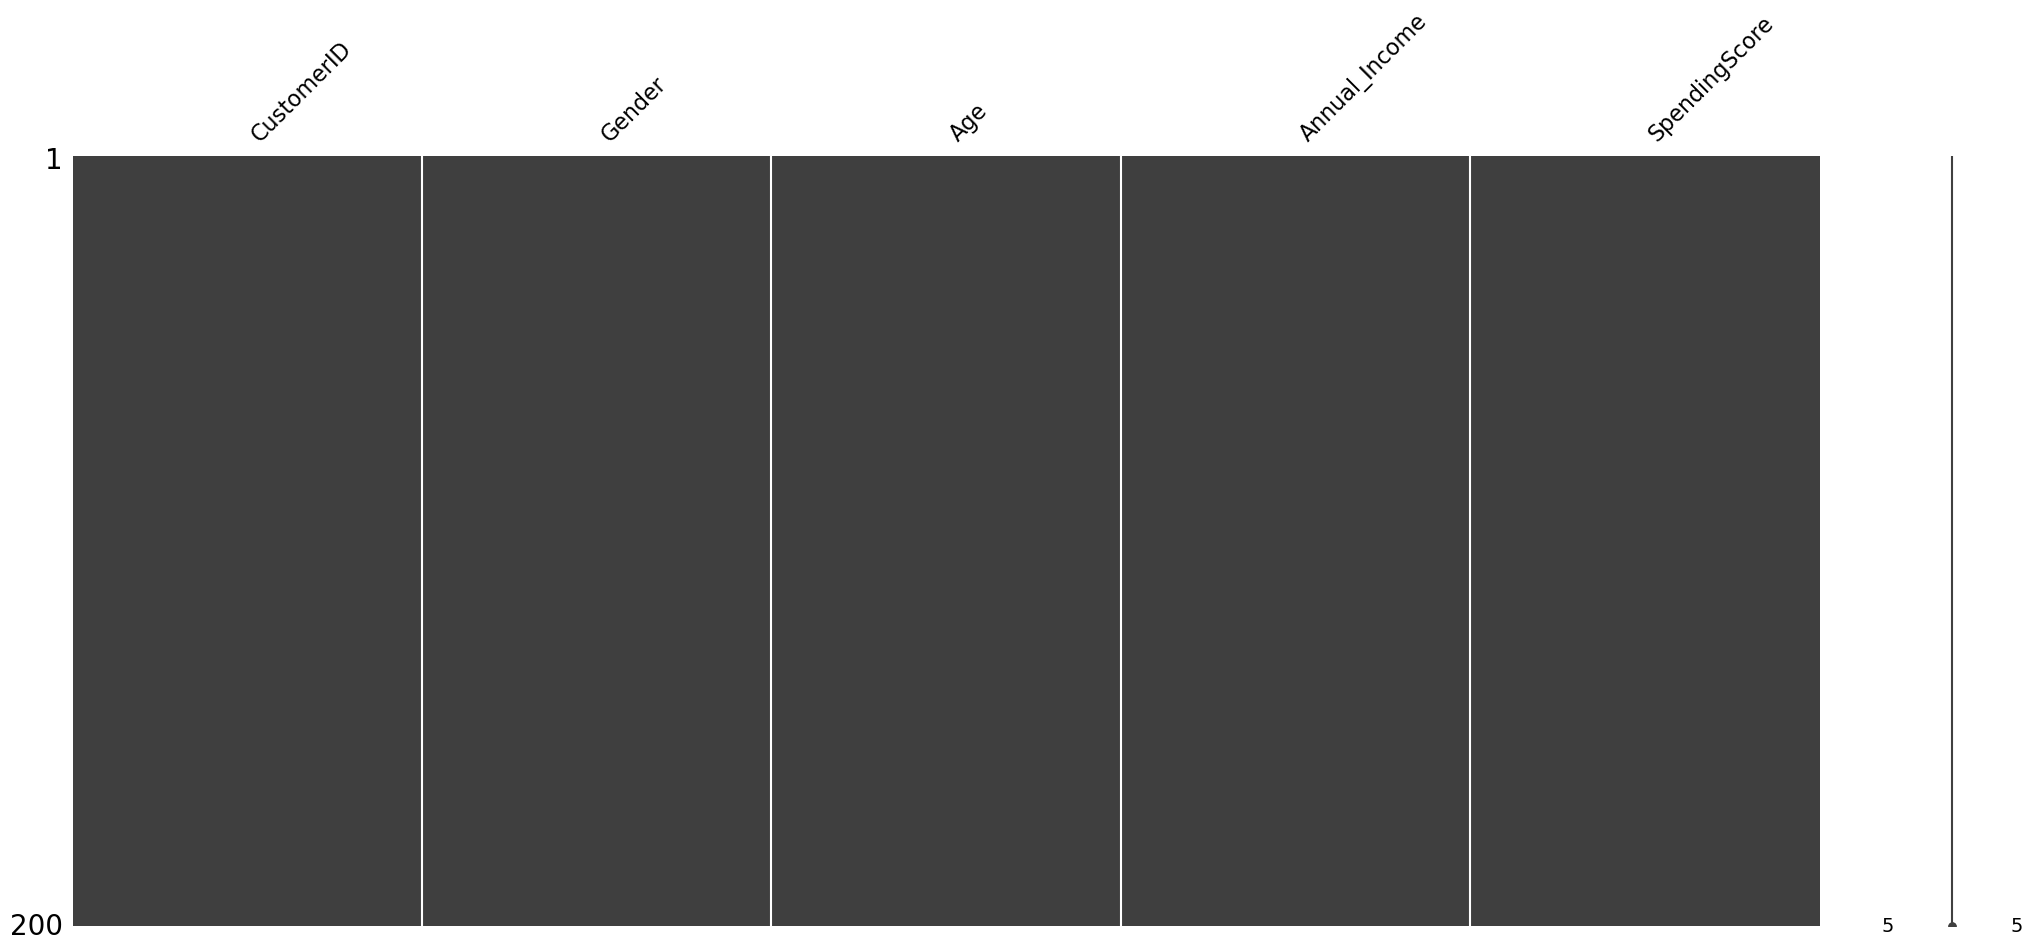

In [16]:
msno.matrix(df)

<Axes: >

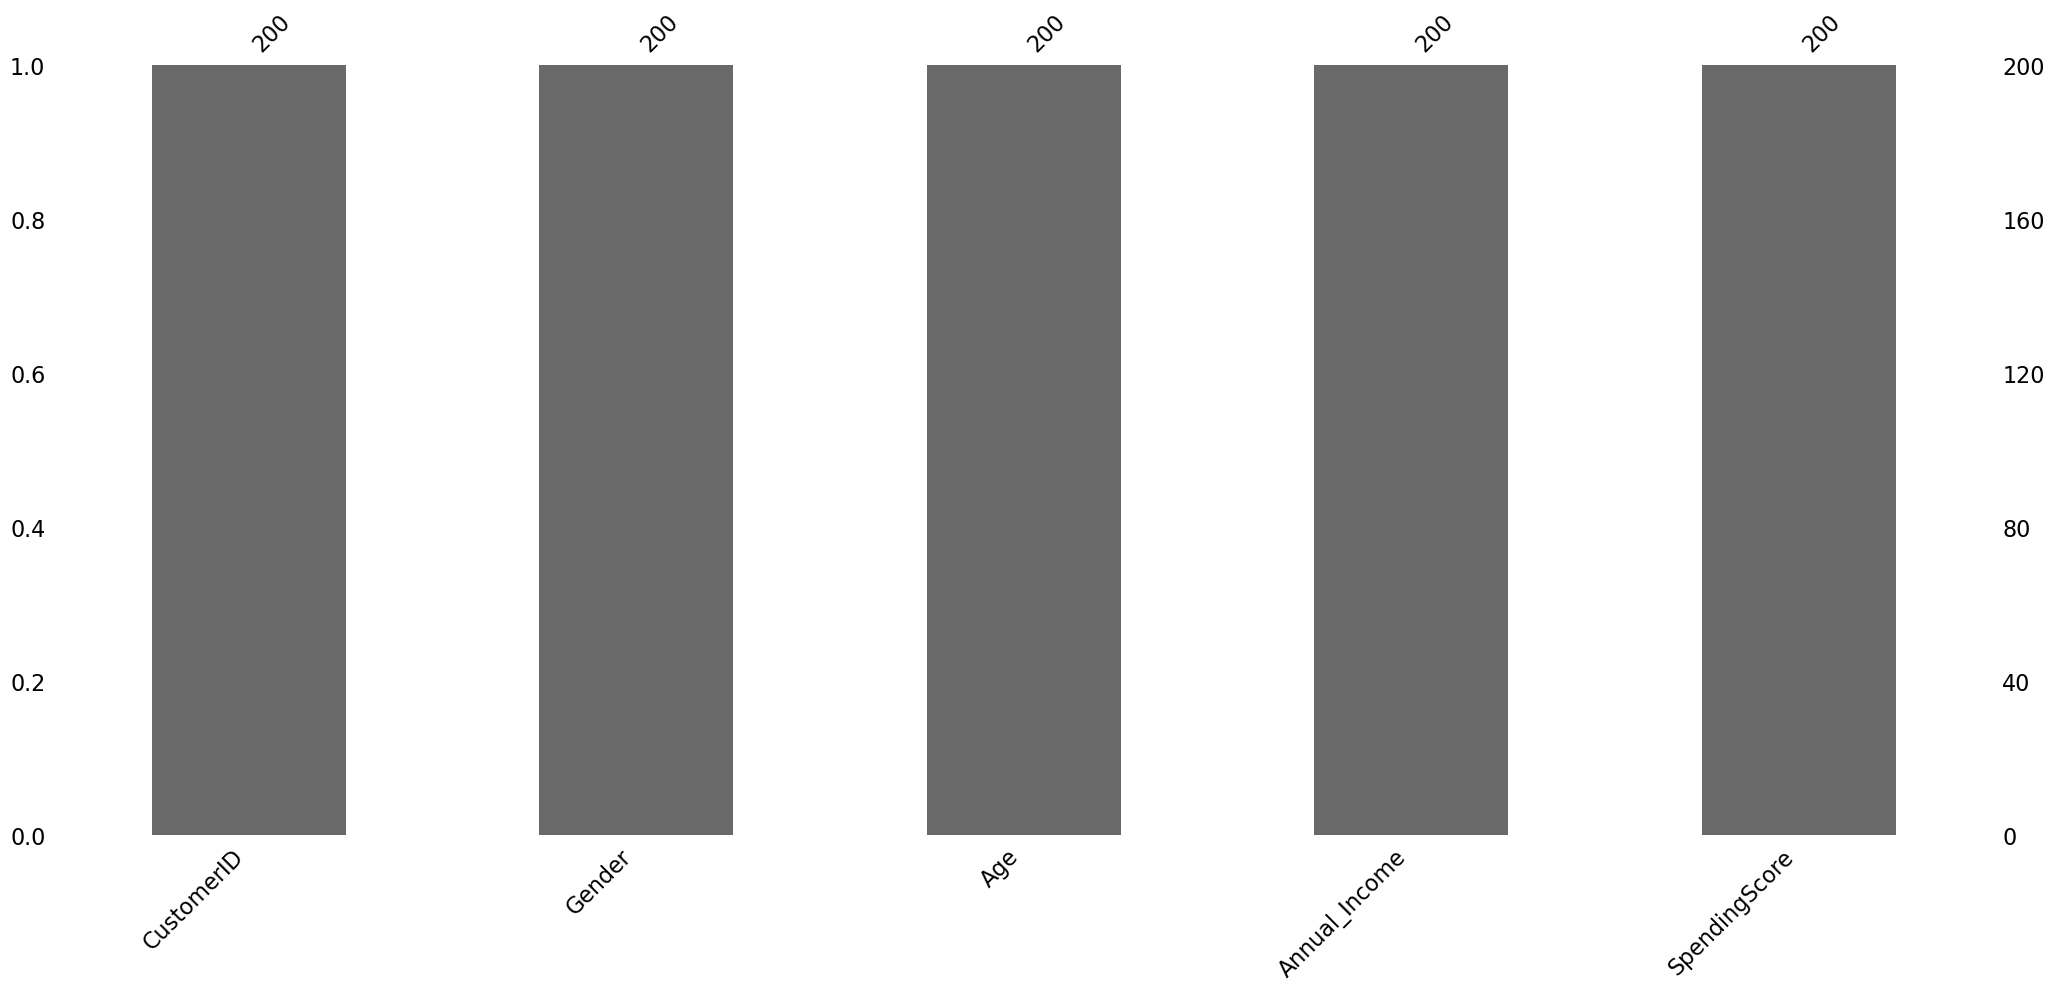

In [17]:
msno.bar(df)

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\1242620235.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.select_dtypes(include='number').values, labels=df.select_dtypes(include='number').columns)


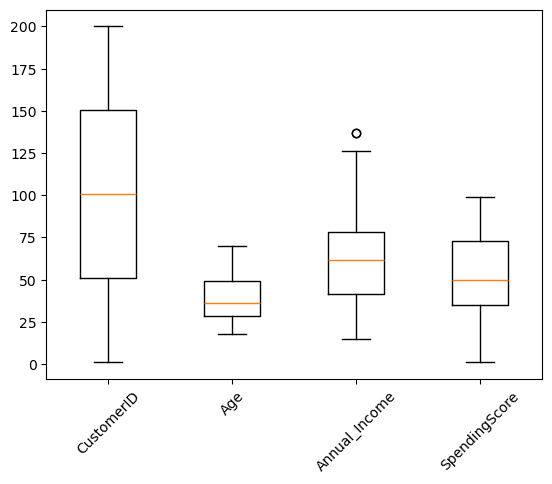

In [18]:
plt.boxplot(df.select_dtypes(include='number').values, labels=df.select_dtypes(include='number').columns)
plt.xticks(rotation=45)
plt.show()

In [19]:
num_columns = df.select_dtypes(include=['number']).columns
num_plots = len(num_columns)

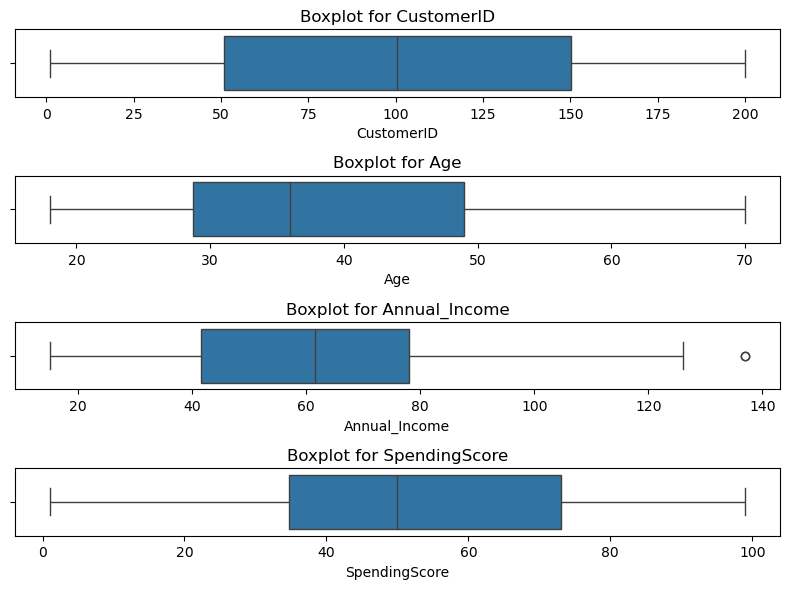

In [20]:
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6))

for i, column in enumerate(num_columns):

    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

## EDA

In [22]:
df.corr(numeric_only = True)

CustomerID       Age  Annual_Income  SpendingScore
CustomerID       1.000000 -0.026763       0.977548       0.013835
Age             -0.026763  1.000000      -0.012398      -0.327227
Annual_Income    0.977548 -0.012398       1.000000       0.009903
SpendingScore    0.013835 -0.327227       0.009903       1.000000

In [23]:
df.iloc[:,1:].corr(numeric_only = True)

Age  Annual_Income  SpendingScore
Age            1.000000      -0.012398      -0.327227
Annual_Income -0.012398       1.000000       0.009903
SpendingScore -0.327227       0.009903       1.000000

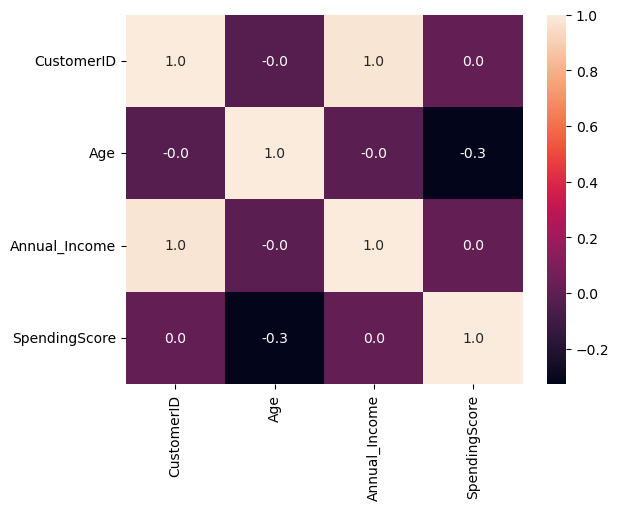

In [24]:
sns.heatmap(df.corr(numeric_only = True),annot=True,fmt='.1f')
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\3801988694.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\mo\AppData\Local\Temp\ipykernel_10048\3801988694.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

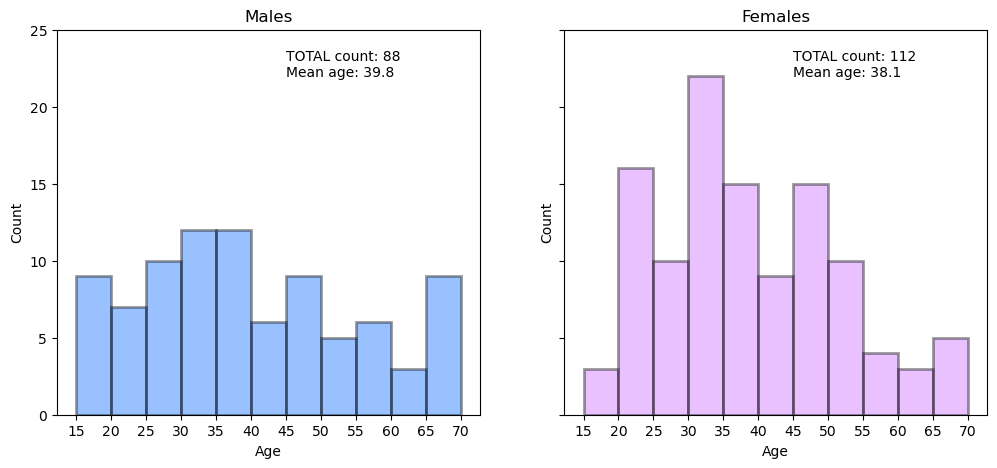

In [25]:
males_age = df[df['Gender']=='Male']['Age'] # subset with males age
females_age = df[df['Gender']=='Female']['Age'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(males_age.count()))
ax1.text(45,22, "Mean age: {:.1f}".format(males_age.mean()))

# females histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(females_age.count()))
ax2.text(45,22, "Mean age: {:.1f}".format(females_age.mean()))

plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\2902167180.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
C:\Users\mo\AppData\Local\Temp\ipykernel_10048\2902167180.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

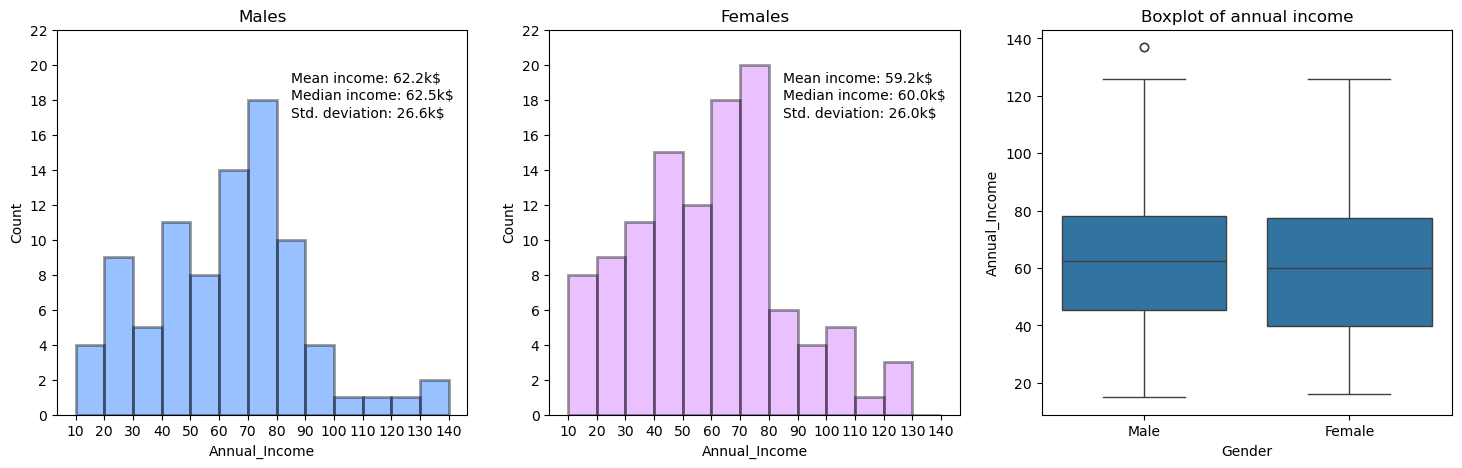

In [26]:
males_income = df[df['Gender']=='Male']['Annual_Income'] # subset with males income
females_income = df[df['Gender']=='Female']['Annual_Income'] # subset with females income

my_bins = range(10,150,10)

# males histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0,24,2))
ax1.set_ylim(0,22)
ax1.set_title('Males')
ax1.set_ylabel('Count')
ax1.text(85,19, "Mean income: {:.1f}k$".format(males_income.mean()))
ax1.text(85,18, "Median income: {:.1f}k$".format(males_income.median()))
ax1.text(85,17, "Std. deviation: {:.1f}k$".format(males_income.std()))

# females histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0,24,2))
ax2.set_ylim(0,22)
ax2.set_title('Females')
ax2.set_ylabel('Count')
ax2.text(85,19, "Mean income: {:.1f}k$".format(females_income.mean()))
ax2.text(85,18, "Median income: {:.1f}k$".format(females_income.median()))
ax2.text(85,17, "Std. deviation: {:.1f}k$".format(females_income.std()))

# boxplot
sns.boxplot(x='Gender', y='Annual_Income', data=df, ax=ax3)
ax3.set_title('Boxplot of annual income')
plt.show()

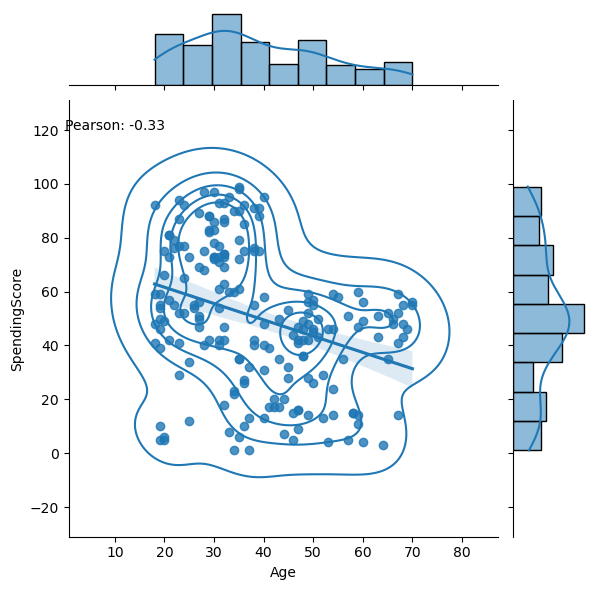

In [27]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
corr, _ = pearsonr(df['Age'], df['SpendingScore'])

# Create jointplot with regression and KDE contours
jp = sns.jointplot(data=df, x='Age', y='SpendingScore', kind='reg')
jp.plot_joint(sns.kdeplot, zorder=0, n_levels=6)

# Add Pearson correlation text
plt.text(x=0, y=120, s=f'Pearson: {corr:.2f}')

plt.show()

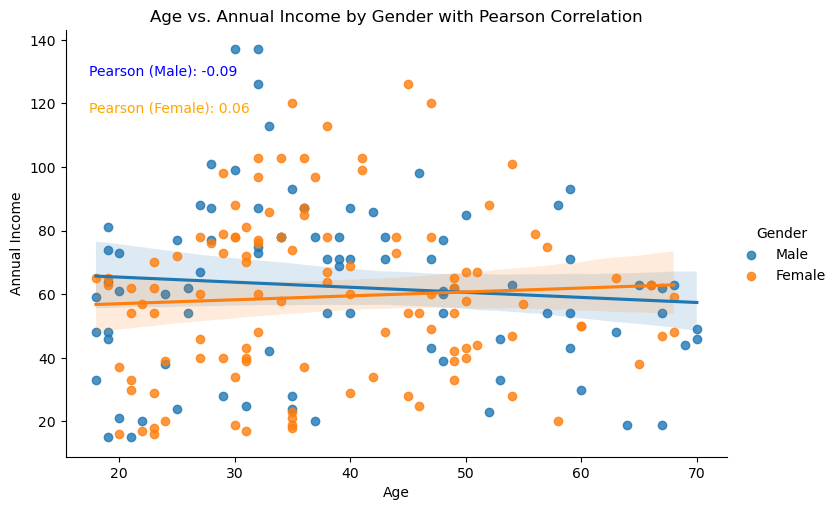

In [28]:
from scipy.stats import pearsonr

# Calculate Pearson correlation for males and females
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

# Plot regression lines colored by Gender
sns.lmplot(data=df, x='Age', y='Annual_Income', hue='Gender', aspect=1.5)

# Get axis limits to adjust text position dynamically
plt_xmin, plt_xmax = plt.gca().get_xlim()
plt_ymin, plt_ymax = plt.gca().get_ylim()

# Add Pearson correlation text near top-left for each gender
plt.text(plt_xmin + 2, plt_ymax * 0.9, f'Pearson (Male): {corr1:.2f}', color='blue')
plt.text(plt_xmin + 2, plt_ymax * 0.82, f'Pearson (Female): {corr2:.2f}', color='orange')

# Add labels and title (optional)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age vs. Annual Income by Gender with Pearson Correlation')

plt.show()

In [29]:
df['Gender'].value_counts().index.tolist()

['Female', 'Male']

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\1109943826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


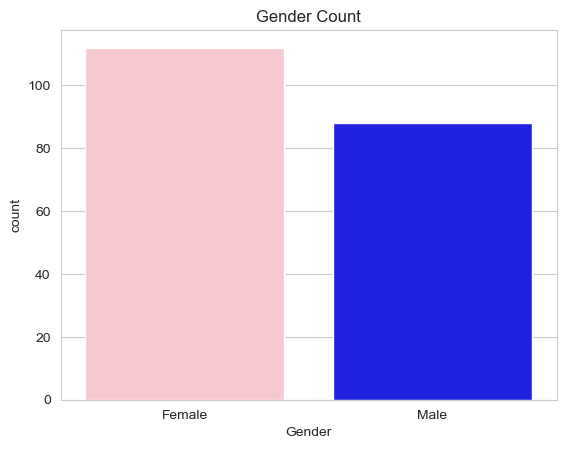

In [30]:
sns.set_style("whitegrid")
sns.countplot(
    data=df,
    x='Gender',
    order=df['Gender'].value_counts().index.tolist(),
    palette={'Male': 'blue', 'Female': 'pink'}
)
plt.title("Gender Count")
plt.show()

In [31]:
labels=df.Gender.unique()
colors=['gray','red']
explode=[0,0.1]
values=df.Gender.value_counts().values

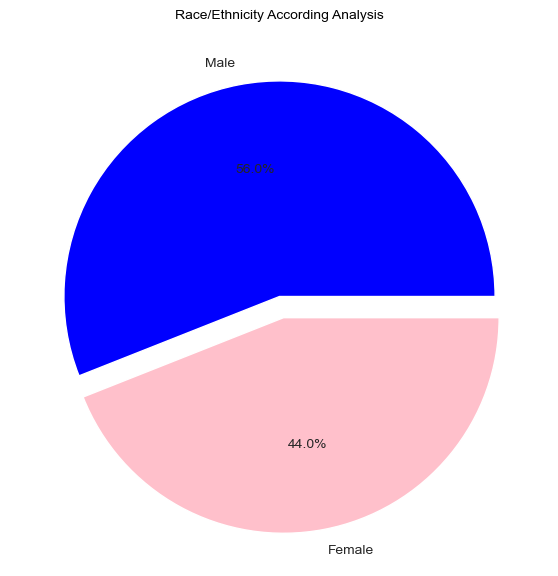

In [32]:
plt.figure(figsize=(7,7))
colors = ['blue', 'pink']
plt.pie(
    values,
    explode=explode,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%'
)
plt.title('Race/Ethnicity According Analysis', color='black', fontsize=10)
plt.show()


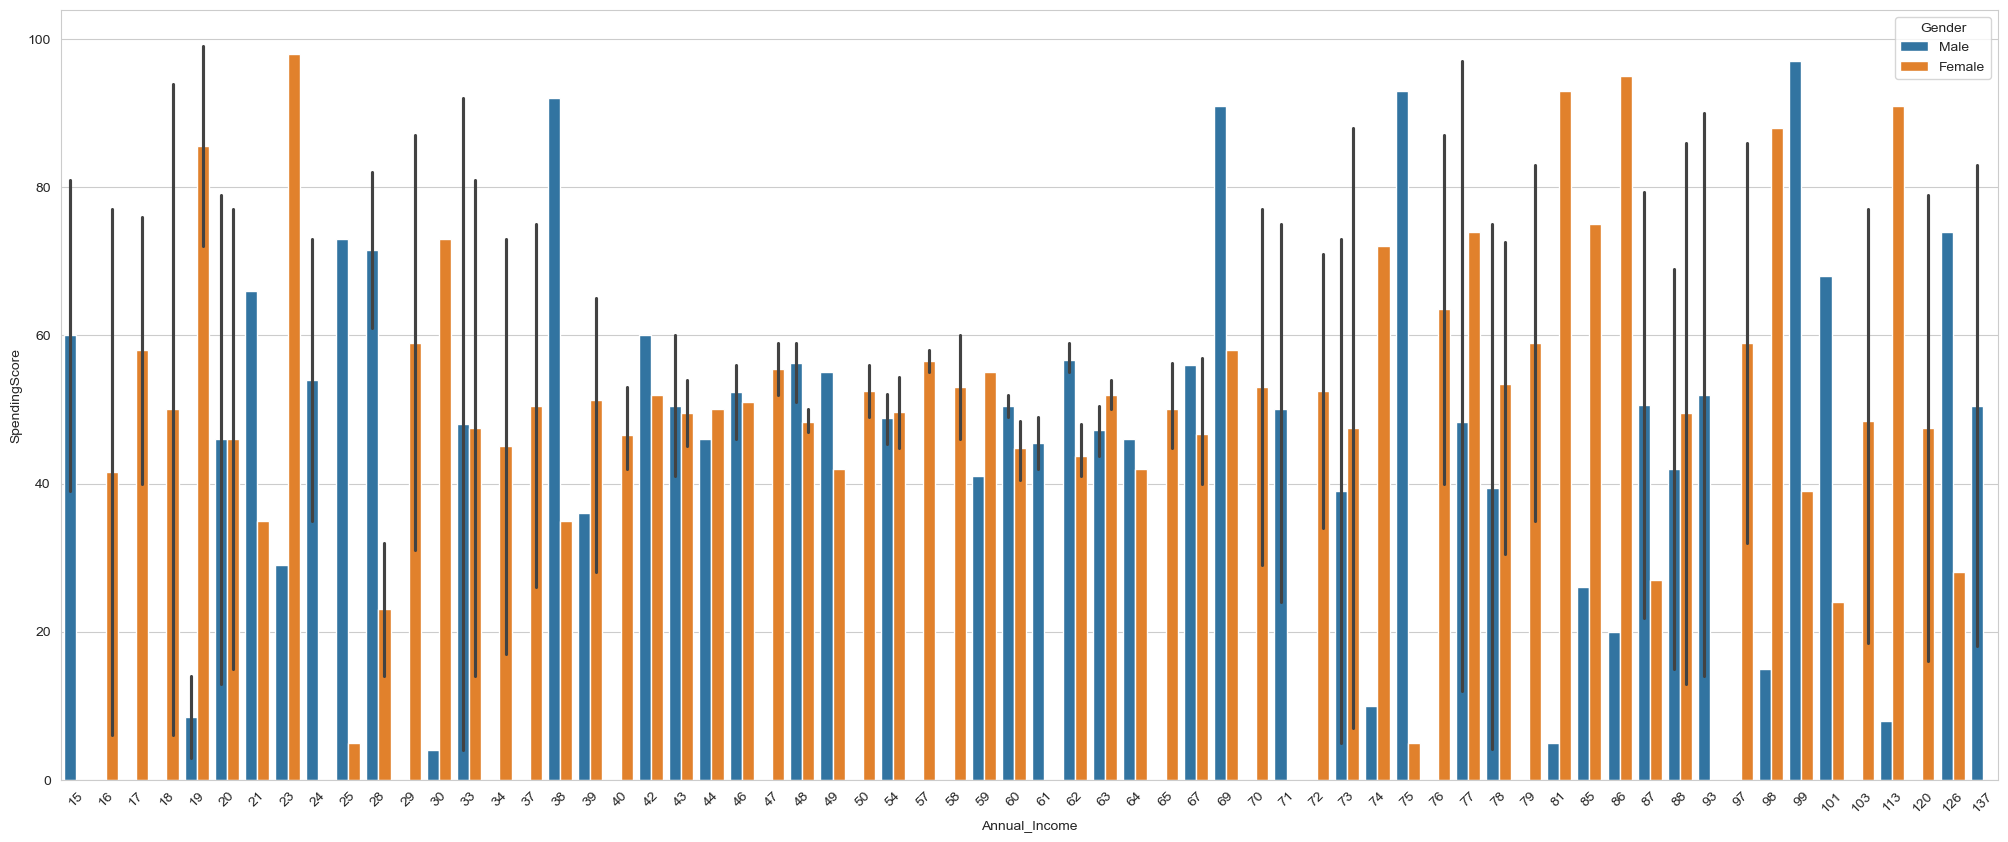

In [33]:
plt.figure(figsize=(25,10))
sns.barplot(x = "Annual_Income", y = "SpendingScore", hue = "Gender", data = df)
plt.xticks(rotation=45)
plt.show()

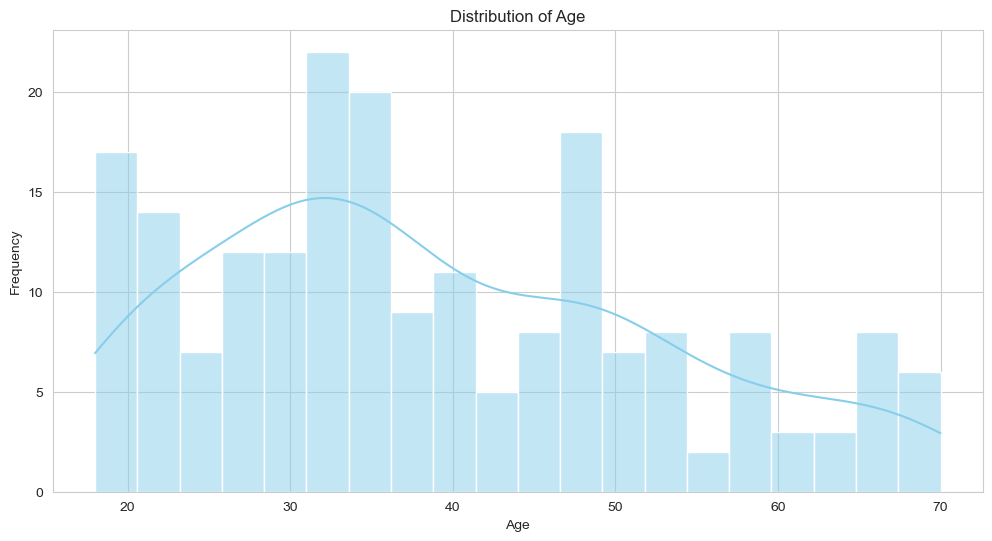

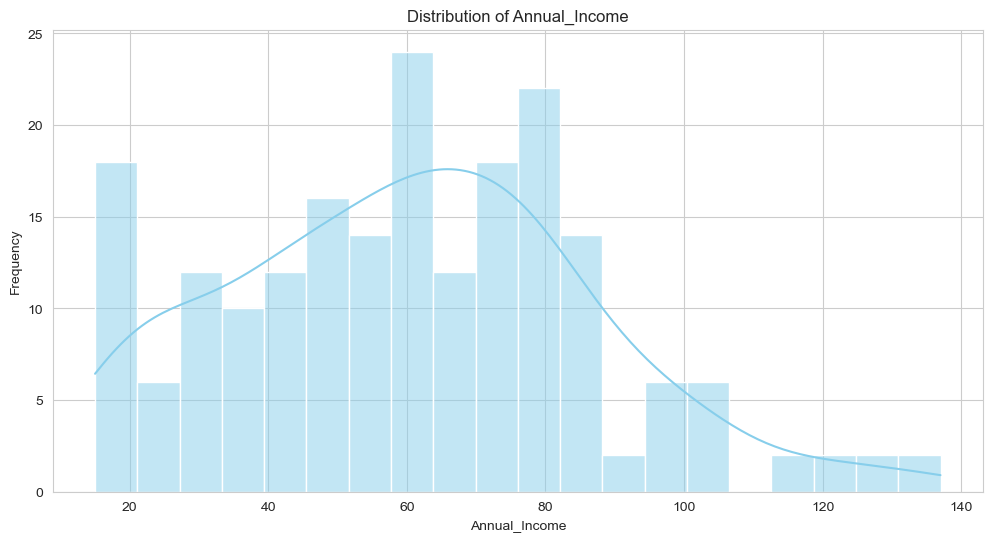

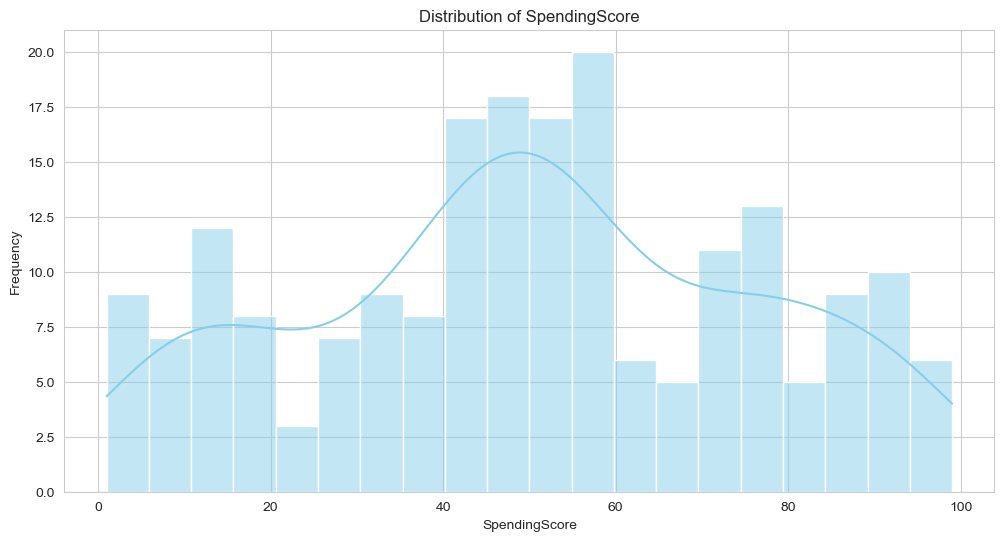

In [34]:
columns = ['Age', 'Annual_Income', 'SpendingScore']

for col in columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\2817381351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Gender', y='SpendingScore', palette={'Male': 'blue', 'Female': 'pink'})


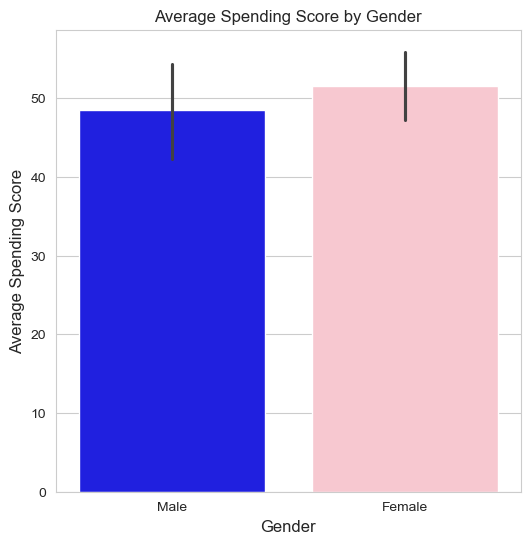

In [35]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Gender', y='SpendingScore', palette={'Male': 'blue', 'Female': 'pink'})
plt.title('Average Spending Score by Gender', fontsize = 12)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Average Spending Score', fontsize = 12)
plt.show()

In [36]:
df['Annual_Income'].value_counts().index.tolist()

[54,
 78,
 48,
 71,
 63,
 62,
 87,
 60,
 88,
 77,
 46,
 43,
 40,
 39,
 33,
 28,
 103,
 73,
 20,
 19,
 65,
 67,
 75,
 74,
 76,
 15,
 86,
 79,
 81,
 85,
 93,
 97,
 98,
 99,
 101,
 113,
 120,
 126,
 72,
 61,
 70,
 69,
 17,
 18,
 21,
 23,
 24,
 25,
 29,
 30,
 34,
 37,
 38,
 42,
 44,
 47,
 49,
 50,
 57,
 58,
 59,
 16,
 64,
 137]

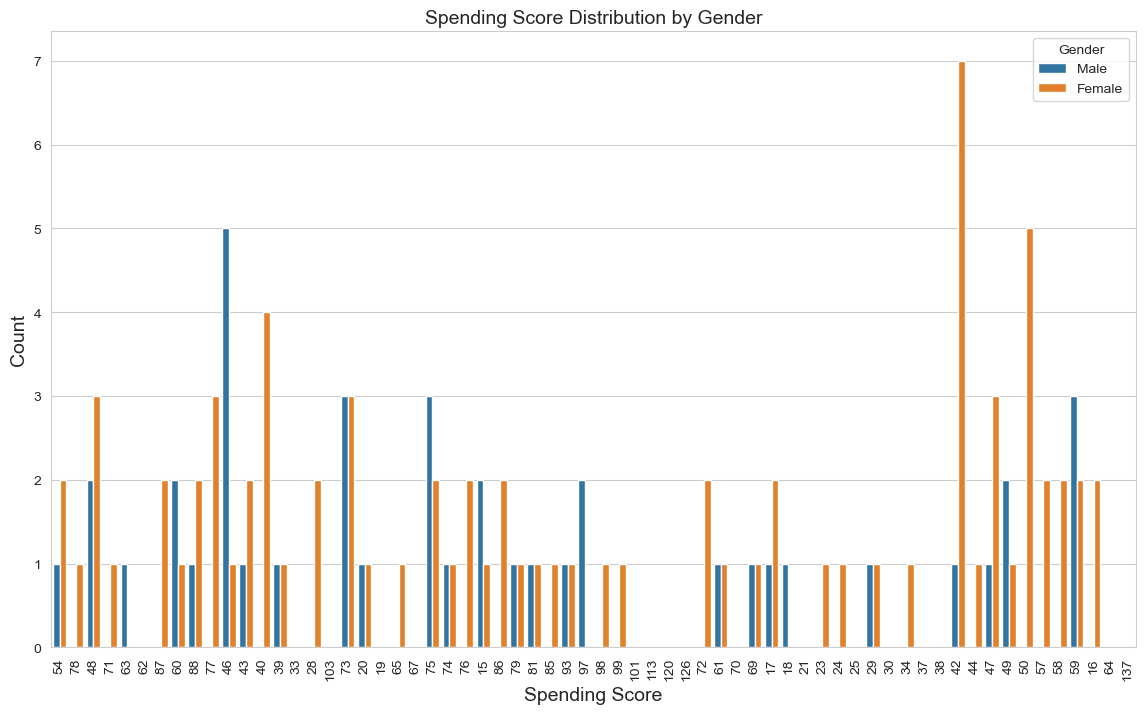

In [37]:
plt.figure(figsize = (14, 8))
sns.countplot(data = df, x = 'SpendingScore', hue = 'Gender', order = df['Annual_Income'].value_counts().index.tolist())
plt.title('Spending Score Distribution by Gender', fontsize=14)
plt.xlabel('Spending Score', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.show()

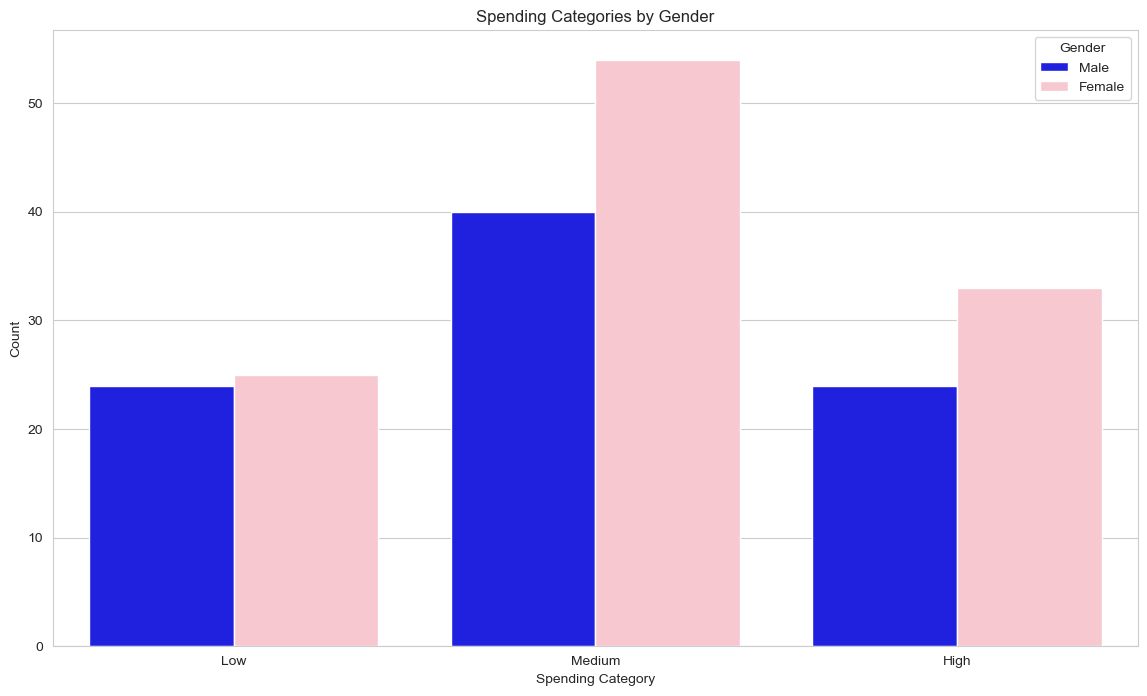

In [38]:
df['Spending_Category'] = pd.cut(df['SpendingScore'], bins=[0, 33, 66, 100], labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Spending_Category', hue='Gender', palette={'Male':'blue', 'Female':'pink'})
plt.title('Spending Categories by Gender')
plt.xlabel('Spending Category')
plt.ylabel('Count')
plt.show()

In [39]:
high_spenders = df[df['SpendingScore'] > 66]

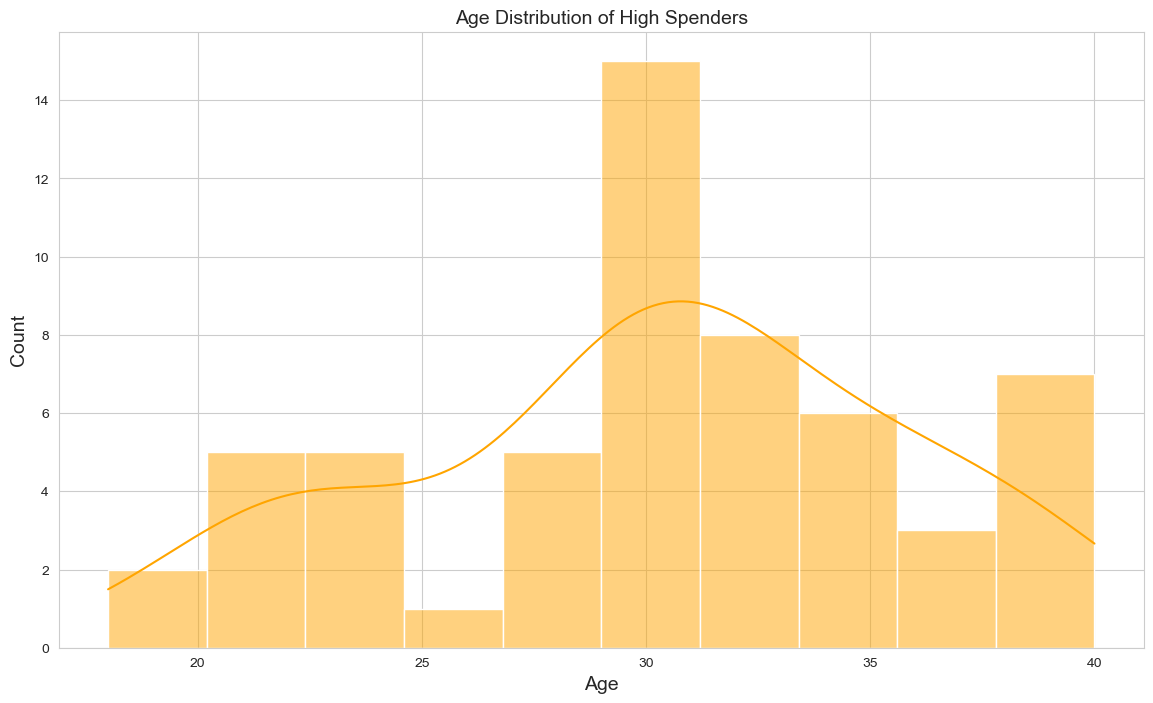

In [40]:
plt.figure(figsize=(14, 8))
sns.histplot(high_spenders['Age'], bins=10, kde=True, color='orange')
plt.title('Age Distribution of High Spenders', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

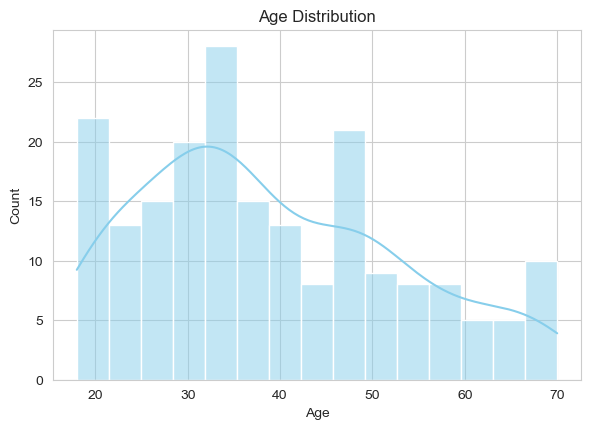

In [41]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', kde=True, bins=15, color='skyblue')
plt.title('Age Distribution')
plt.show()

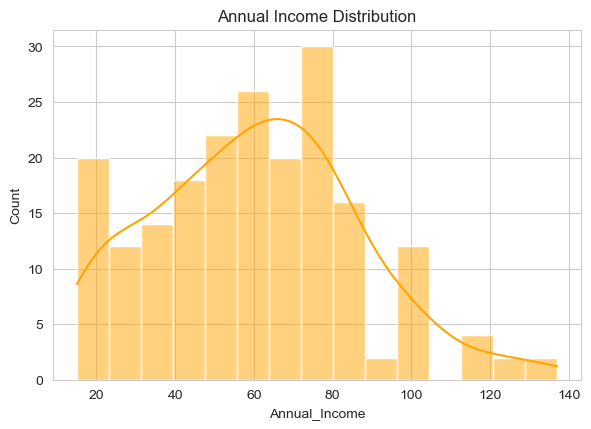

In [42]:
# Annual Income distribution
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Annual_Income', kde=True, bins=15, color='orange')
plt.title('Annual Income Distribution')
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\2866706797.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Spending_Category', palette='Set2')


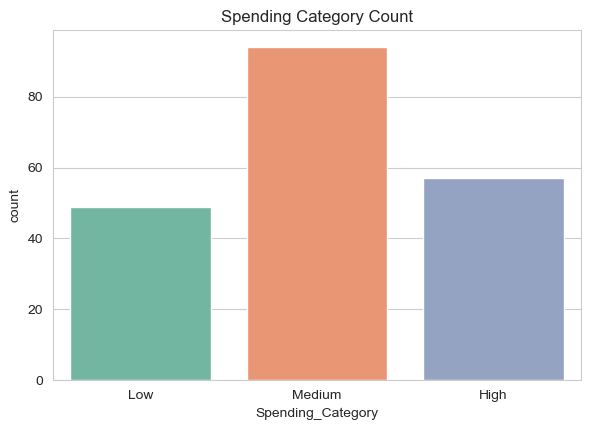

In [43]:
# Spending Category count
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Spending_Category', palette='Set2')
plt.title('Spending Category Count')
plt.show()

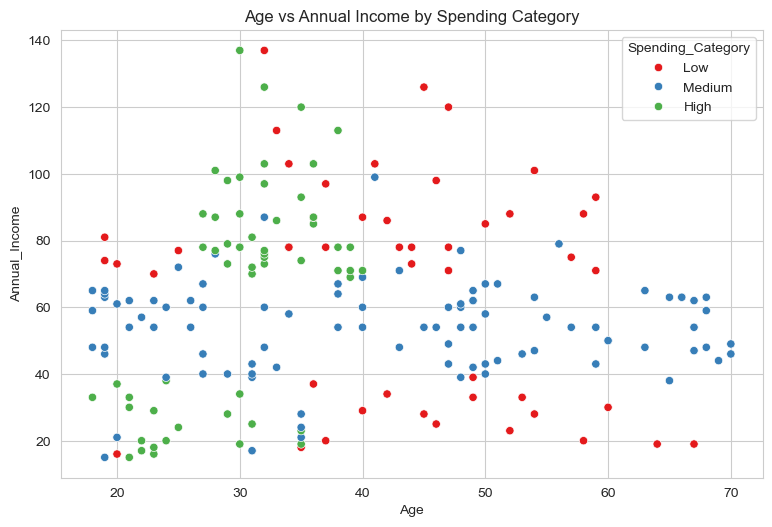

In [44]:
# Relation between Age and Annual Income with Spending Category hue\
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Age', y='Annual_Income', hue='Spending_Category', palette='Set1')
plt.title('Age vs Annual Income by Spending Category')

plt.tight_layout()
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\3098218591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Spending_Category', y='Annual_Income', palette='Set3')


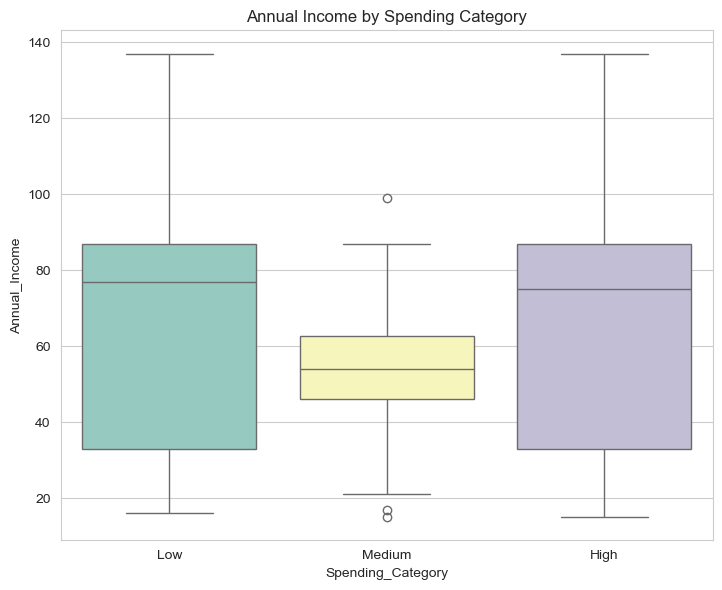

In [45]:
# Boxplot to display the distribution of income and age by spending category
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Spending_Category', y='Annual_Income', palette='Set3')
plt.title('Annual Income by Spending Category')
plt.tight_layout()
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\1618946058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Spending_Category', y='Age', palette='Set3')


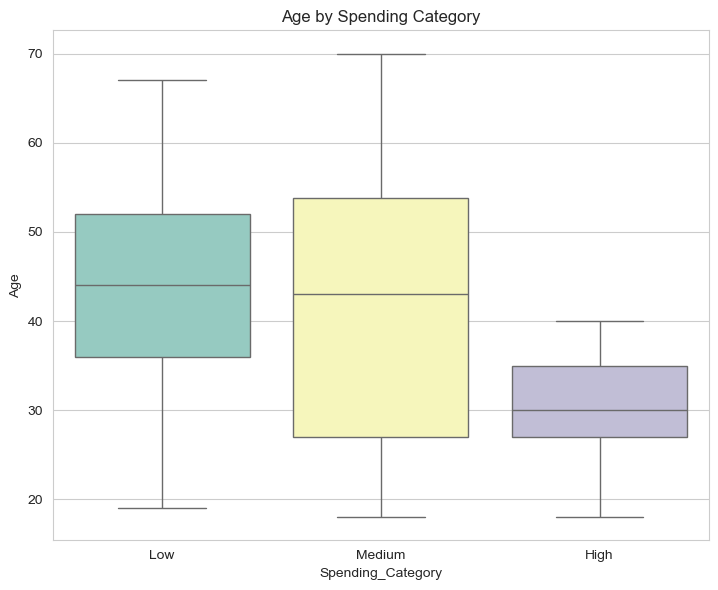

In [46]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Spending_Category', y='Age', palette='Set3')
plt.title('Age by Spending Category')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

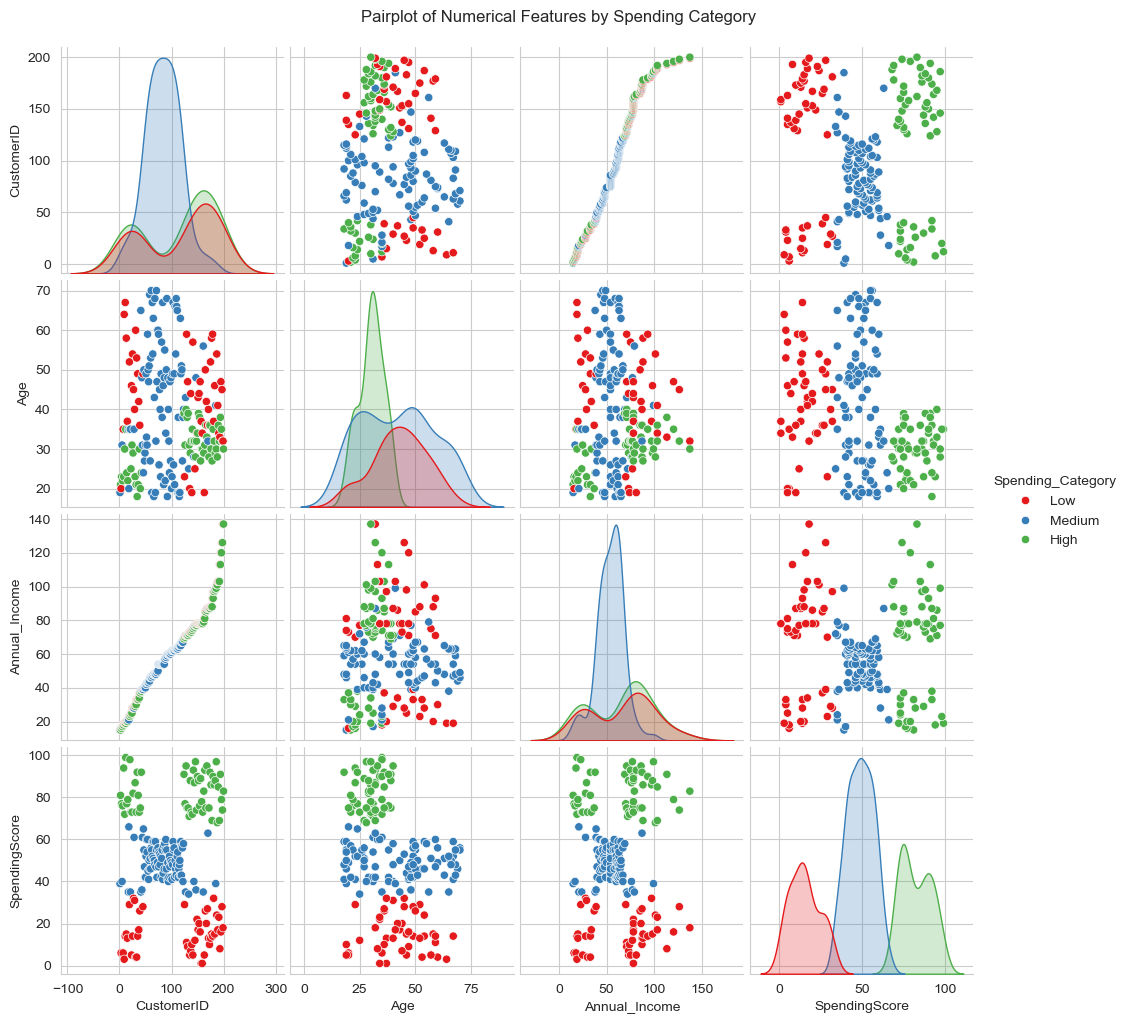

In [47]:
# Pairplot to show the relationship between numerical variables
plt.figure(figsize=(14, 6))
sns.pairplot(df, hue='Spending_Category', palette='Set1')
plt.suptitle('Pairplot of Numerical Features by Spending Category', y=1.02)
plt.show()

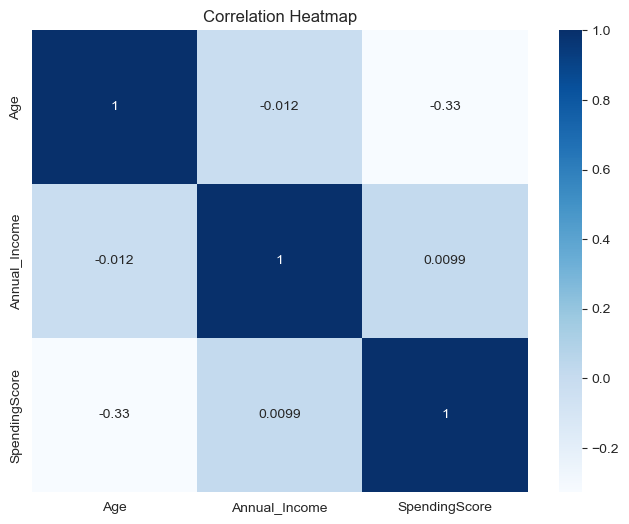

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Annual_Income', 'SpendingScore']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [49]:
print('Max: ', max(df[df['Gender'] == 'Male'].SpendingScore))
print('Min: ', min(df[df['Gender'] == 'Male'].SpendingScore))
print('Mean: ', np.mean(df[df['Gender'] == 'Male'].SpendingScore))
print('Std: ', np.std(df[df['Gender'] == 'Male'].SpendingScore))

Max:  97
Min:  1
Mean:  48.51136363636363
Std:  27.737812359739767


In [50]:
print('Max: ', max(df[df['Gender'] == 'Female'].SpendingScore))
print('Min: ', min(df[df['Gender'] == 'Female'].SpendingScore))
print('Mean: ', np.mean(df[df['Gender'] == 'Female'].SpendingScore))
print('Std: ', np.std(df[df['Gender'] == 'Female'].SpendingScore))

Max:  99
Min:  5
Mean:  51.526785714285715
Std:  24.007052468801657


In [51]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [52]:
len(df['Age'].unique())

51

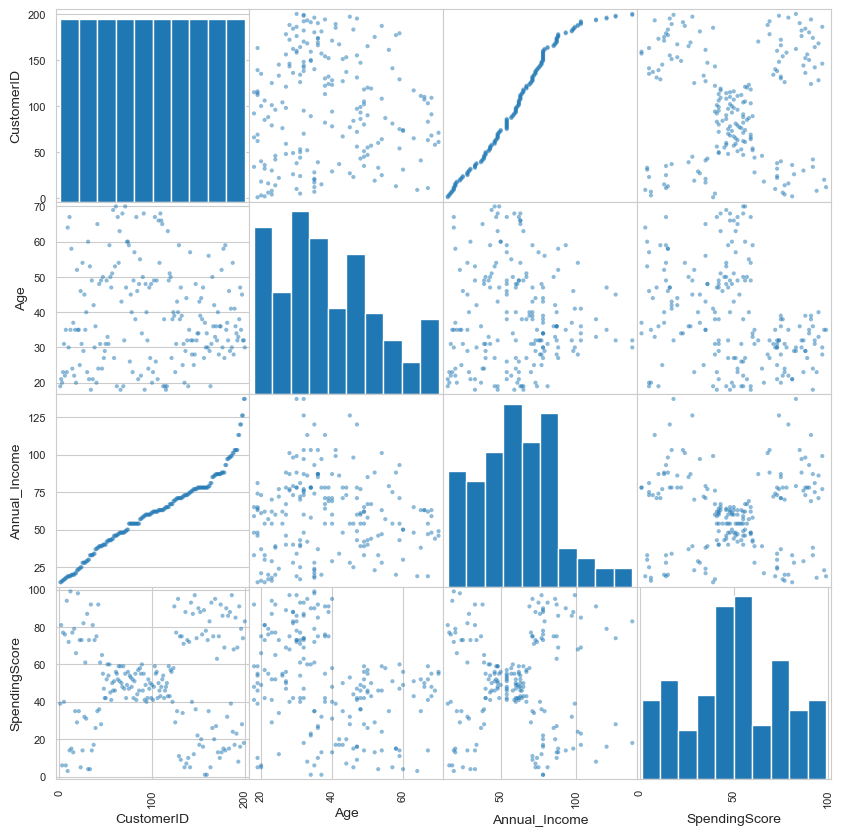

<Figure size 640x480 with 0 Axes>

In [53]:
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.figure()
plt.show()

In [54]:
age_income=[]
age_unique=df['Age'].unique()
for age in age_unique:
    age_income.append(sum(df[df['Age']==age].Annual_Income))

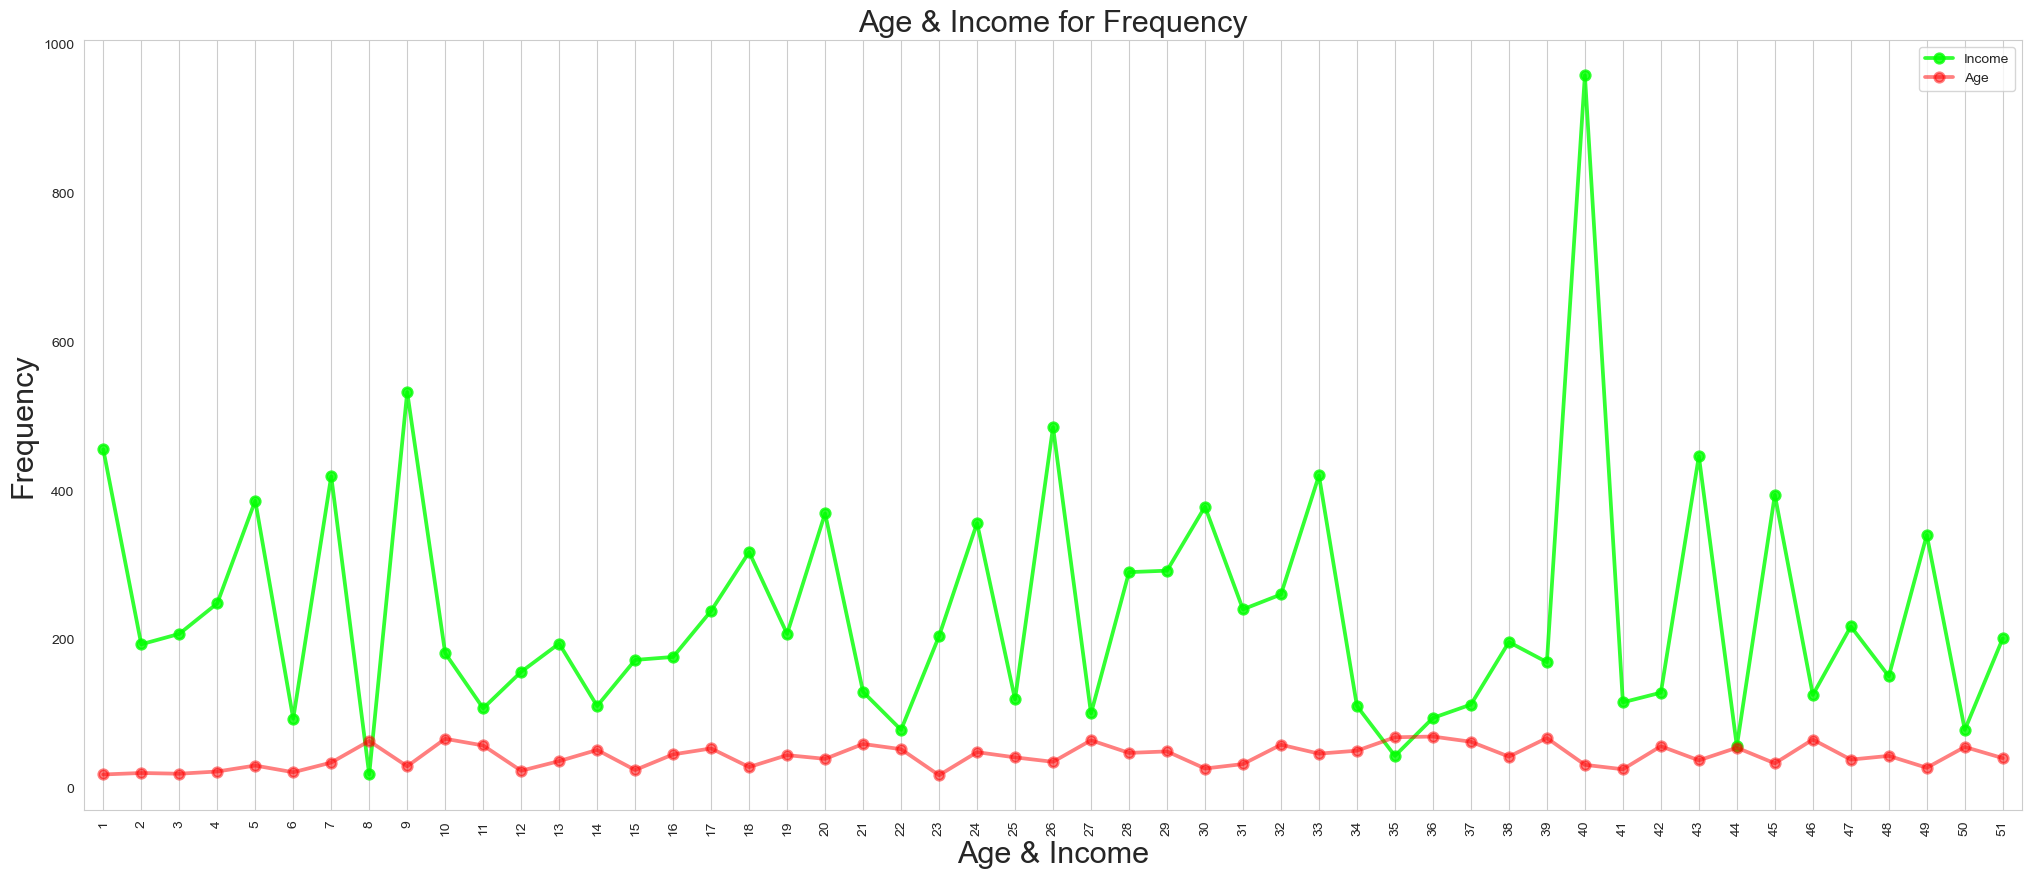

In [55]:
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(1,52),y=age_income,color='lime',alpha=0.8,label='Income')
sns.pointplot(x=np.arange(1,52),y=age_unique,color='red',alpha=0.5,label='Age')
plt.xlabel('Age & Income', fontsize = 22)
plt.ylabel('Frequency', fontsize = 22)
plt.title('Age & Income for Frequency', fontsize = 22)
plt.xticks(rotation=90)
plt.grid()
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\2282080959.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Annual_Income'],y=df['Gender'], palette = {'Male': 'pink', 'Female': 'blue'})


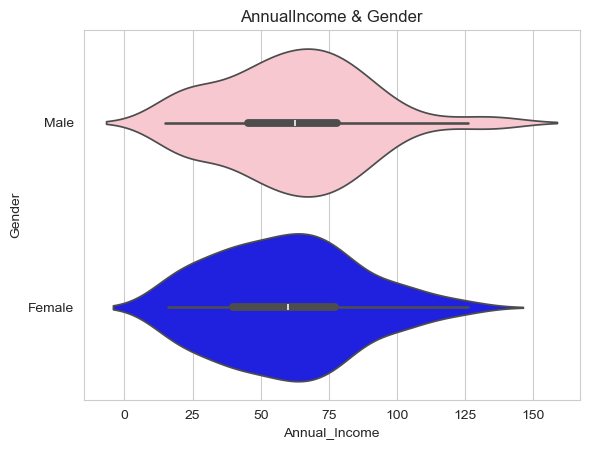

In [56]:
sns.violinplot(x=df['Annual_Income'],y=df['Gender'], palette = {'Male': 'pink', 'Female': 'blue'})
plt.title('AnnualIncome & Gender')
plt.show()

C:\Users\mo\AppData\Local\Temp\ipykernel_10048\3594370359.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y=df['SpendingScore'],x=df['Gender'], palette = {'Male': 'pink', 'Female': 'blue'})


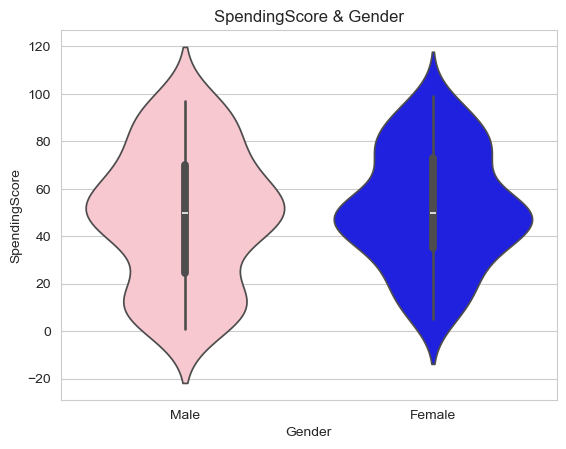

In [57]:
sns.violinplot(y=df['SpendingScore'],x=df['Gender'], palette = {'Male': 'pink', 'Female': 'blue'})
plt.title('SpendingScore & Gender')
plt.show()

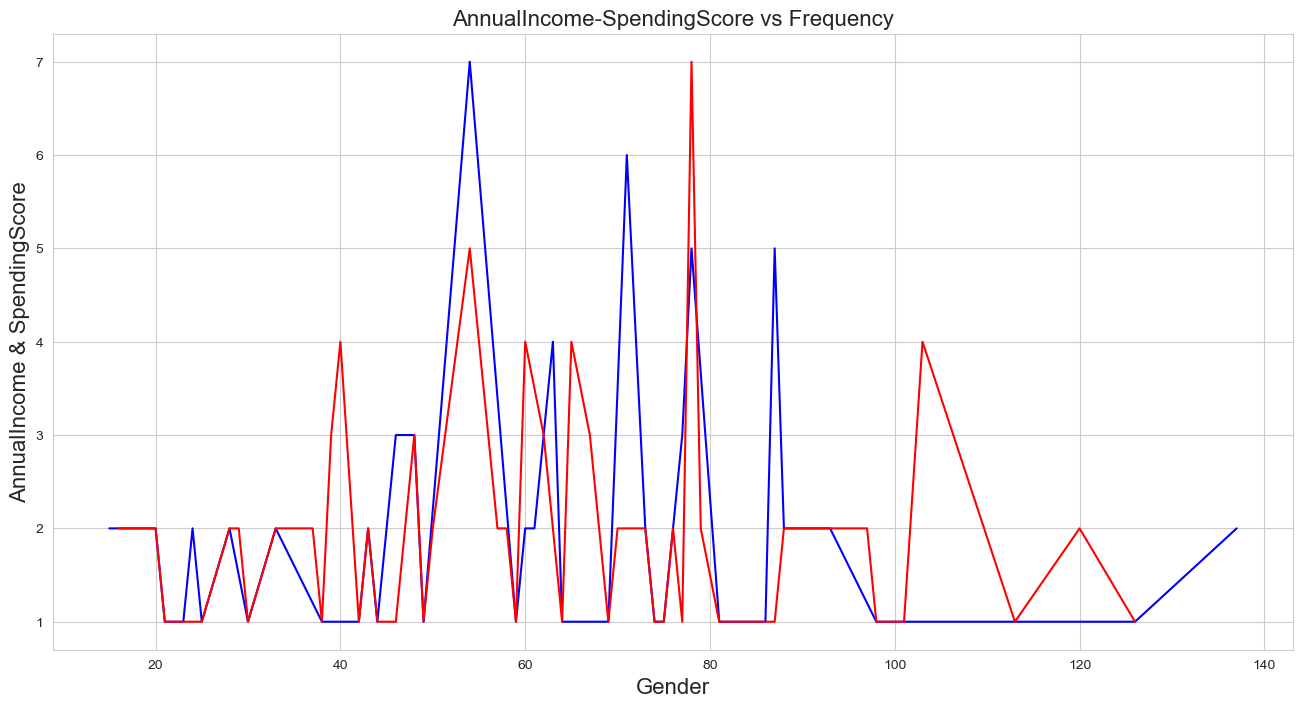

In [58]:
plt.figure(figsize = (16, 8))
df[df['Gender'] == 'Male']['Annual_Income'].value_counts().sort_index().plot(kind = 'line', color = 'b')
df[df['Gender'] == 'Female']['Annual_Income'].value_counts().sort_index().plot(kind = 'line', color = 'r')
plt.xlabel('Gender', fontsize = 16)
plt.ylabel('AnnualIncome & SpendingScore', fontsize = 16)
plt.title('AnnualIncome-SpendingScore vs Frequency', fontsize = 16)
plt.show()

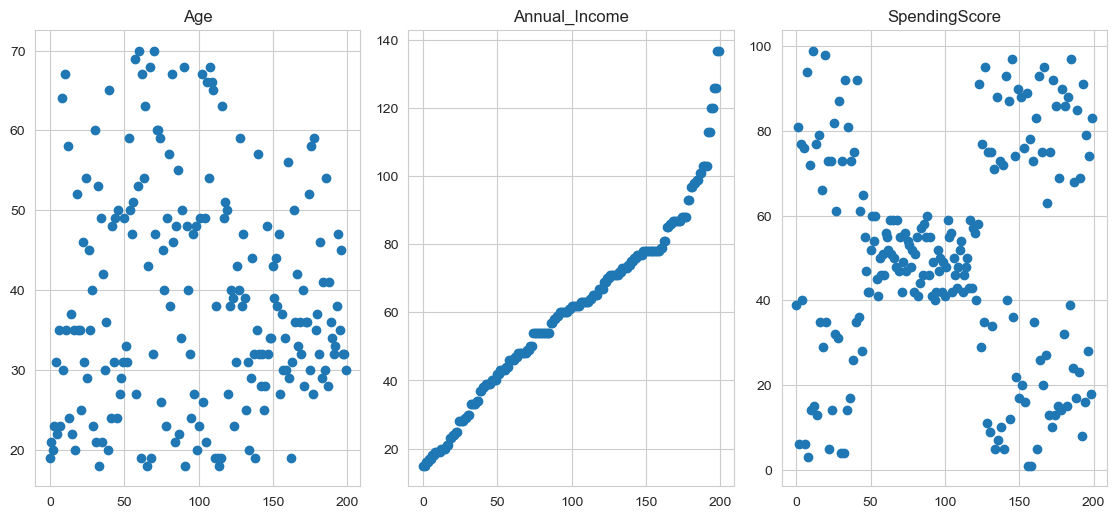

In [59]:
for i,col in enumerate(['Age', 'Annual_Income', 'SpendingScore']):
    plt.subplot(2,4,i+1)
    plt.scatter([i for i in range(200)],df[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(15,10)
    plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

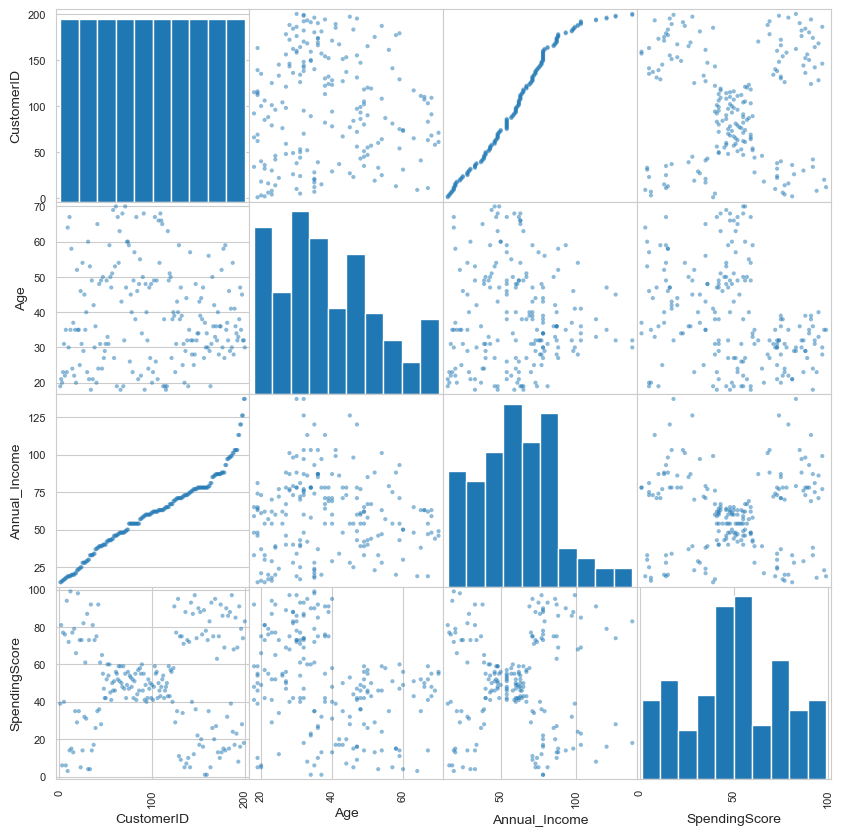

<Figure size 640x480 with 0 Axes>

In [60]:
pd.plotting.scatter_matrix(df,figsize=(10,10))
plt.figure()

### Feature Engineering

In [62]:
df.drop(columns = ['CustomerID'], axis = 1, inplace = True)

In [63]:
num_col = df.select_dtypes(include = 'number')
cat_col = df.select_dtypes(exclude = 'number')

In [64]:
# Purchasing Power Index = (SpendingScore * Annual_Income) / Age
df['Purchasing_Power_Index'] = (df['SpendingScore'] * df['Annual_Income']) / df['Age']

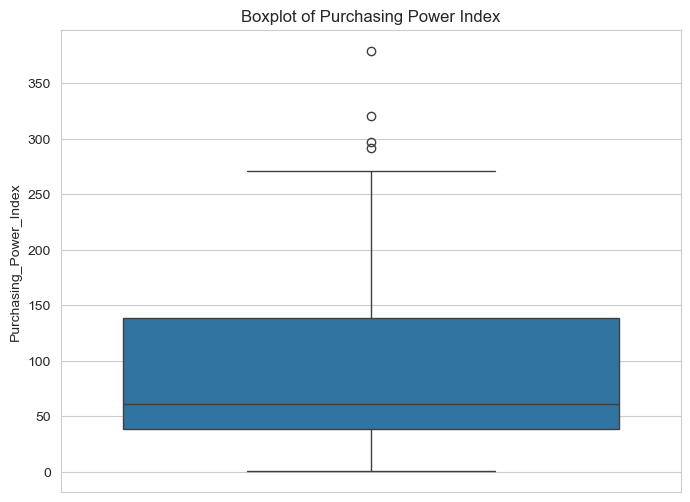

In [65]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Purchasing_Power_Index'])
plt.title('Boxplot of Purchasing Power Index')
plt.show()

In [66]:
IQR = df['Purchasing_Power_Index'].quantile(0.75) - df['Purchasing_Power_Index'].quantile(0.25)
df['Purchasing_Power_Index'] = df['Purchasing_Power_Index'].quantile(0.75) + 1.5 * IQR

In [67]:
df['Purchasing_Power_Index'].duplicated().sum()

199

<Axes: ylabel='Frequency'>

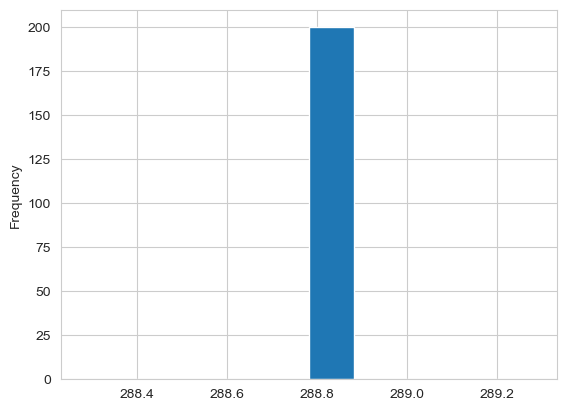

In [68]:
df['Purchasing_Power_Index'].sort_index().plot(kind = 'hist')

In [69]:
df['Income_per_SpendingPoint'] = df['Annual_Income'] / df['SpendingScore'].replace(0, np.nan)

In [70]:
df['Income_per_SpendingPoint'].duplicated().sum()

12

<Axes: ylabel='Frequency'>

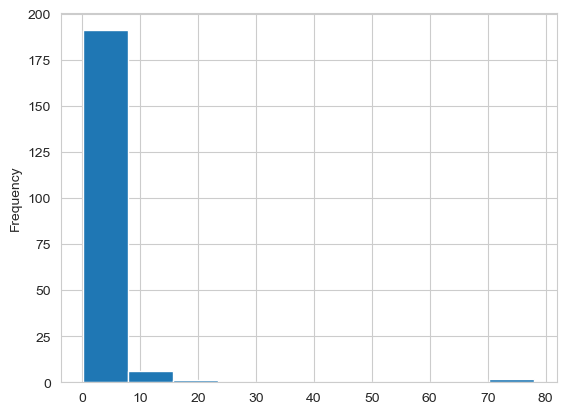

In [71]:
df['Income_per_SpendingPoint'].sort_index(ascending=True).plot(kind = 'hist')

### Feature Transformation

In [73]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [74]:
categories = [['Low', 'Medium', 'High']]

encoder = OrdinalEncoder(categories=categories)

df['Spending_Category_Ordinal'] = encoder.fit_transform(df[['Spending_Category']])

print(df[['Spending_Category', 'Spending_Category_Ordinal']].head())

  Spending_Category  Spending_Category_Ordinal
0            Medium                        1.0
1              High                        2.0
2               Low                        0.0
3              High                        2.0
4            Medium                        1.0


In [75]:
df.drop(['Spending_Category'], axis=1, inplace=True)

In [184]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

#### Splitting Test

In [77]:
X = df.drop('Spending_Category_Ordinal', axis=1)
y = df['Spending_Category_Ordinal']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle = True)

In [79]:
print(f'X_train --> {X_train.shape}')
print(f'y_train --> {y_train.shape}')
print(f'X_test --> {X_test.shape}')
print(f'Y_test --> {X_test.shape}')

X_train --> (160, 6)
y_train --> (160,)
X_test --> (40, 6)
Y_test --> (40, 6)


## K-Means

In [81]:
sse=[]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

C:\Users\mo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

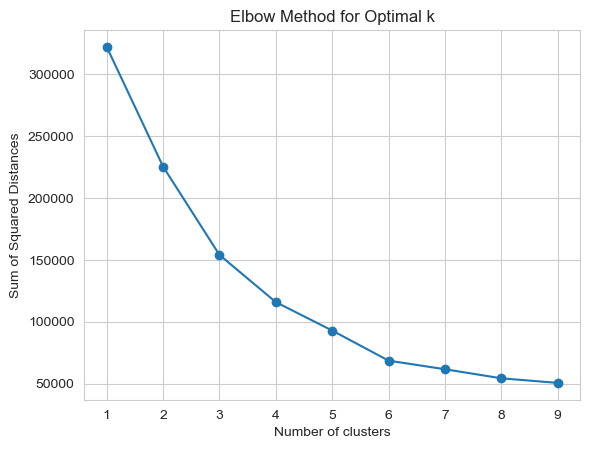

In [82]:
# Plot the elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

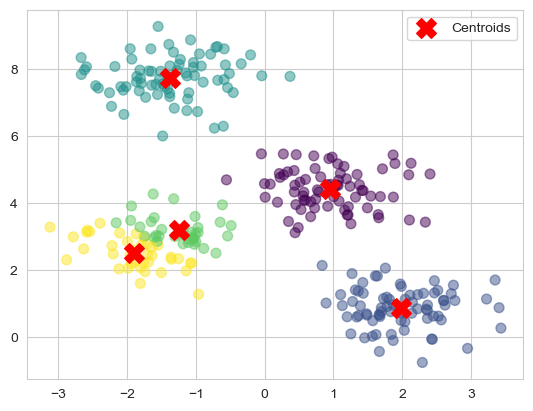

In [162]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans algorithm
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.show()

In [168]:
# Generate 3D data
X3, _ = make_blobs(n_samples=300, centers=4, n_features=3, cluster_std=0.60, random_state=0)

# KMeans clustering
kmeans3 = KMeans(n_clusters=5, random_state=0)
labels3 = kmeans3.fit_predict(X3)

# Create DataFrame for Plotly
df_3d = pd.DataFrame(X3, columns=['x', 'y', 'z'])
df_3d['Cluster'] = labels3.astype(str)

# Plot interactive 3D scatter plot
fig3d = px.scatter_3d(df_3d, x='x', y='y', z='z', color='Cluster', 
                      title='3D KMeans Clustering with Plotly',
                      color_discrete_sequence=px.colors.qualitative.Set1)

# Add centroids
centroids3 = pd.DataFrame(kmeans3.cluster_centers_, columns=['x', 'y', 'z'])
fig3d.add_scatter3d(x=centroids3['x'], y=centroids3['y'], z=centroids3['z'],
                    mode='markers', marker=dict(color='black', size=7, symbol='x'),
                    name='Centroids')

fig3d.show()

In [170]:
# Get the inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Inertia: 194.96601623554275


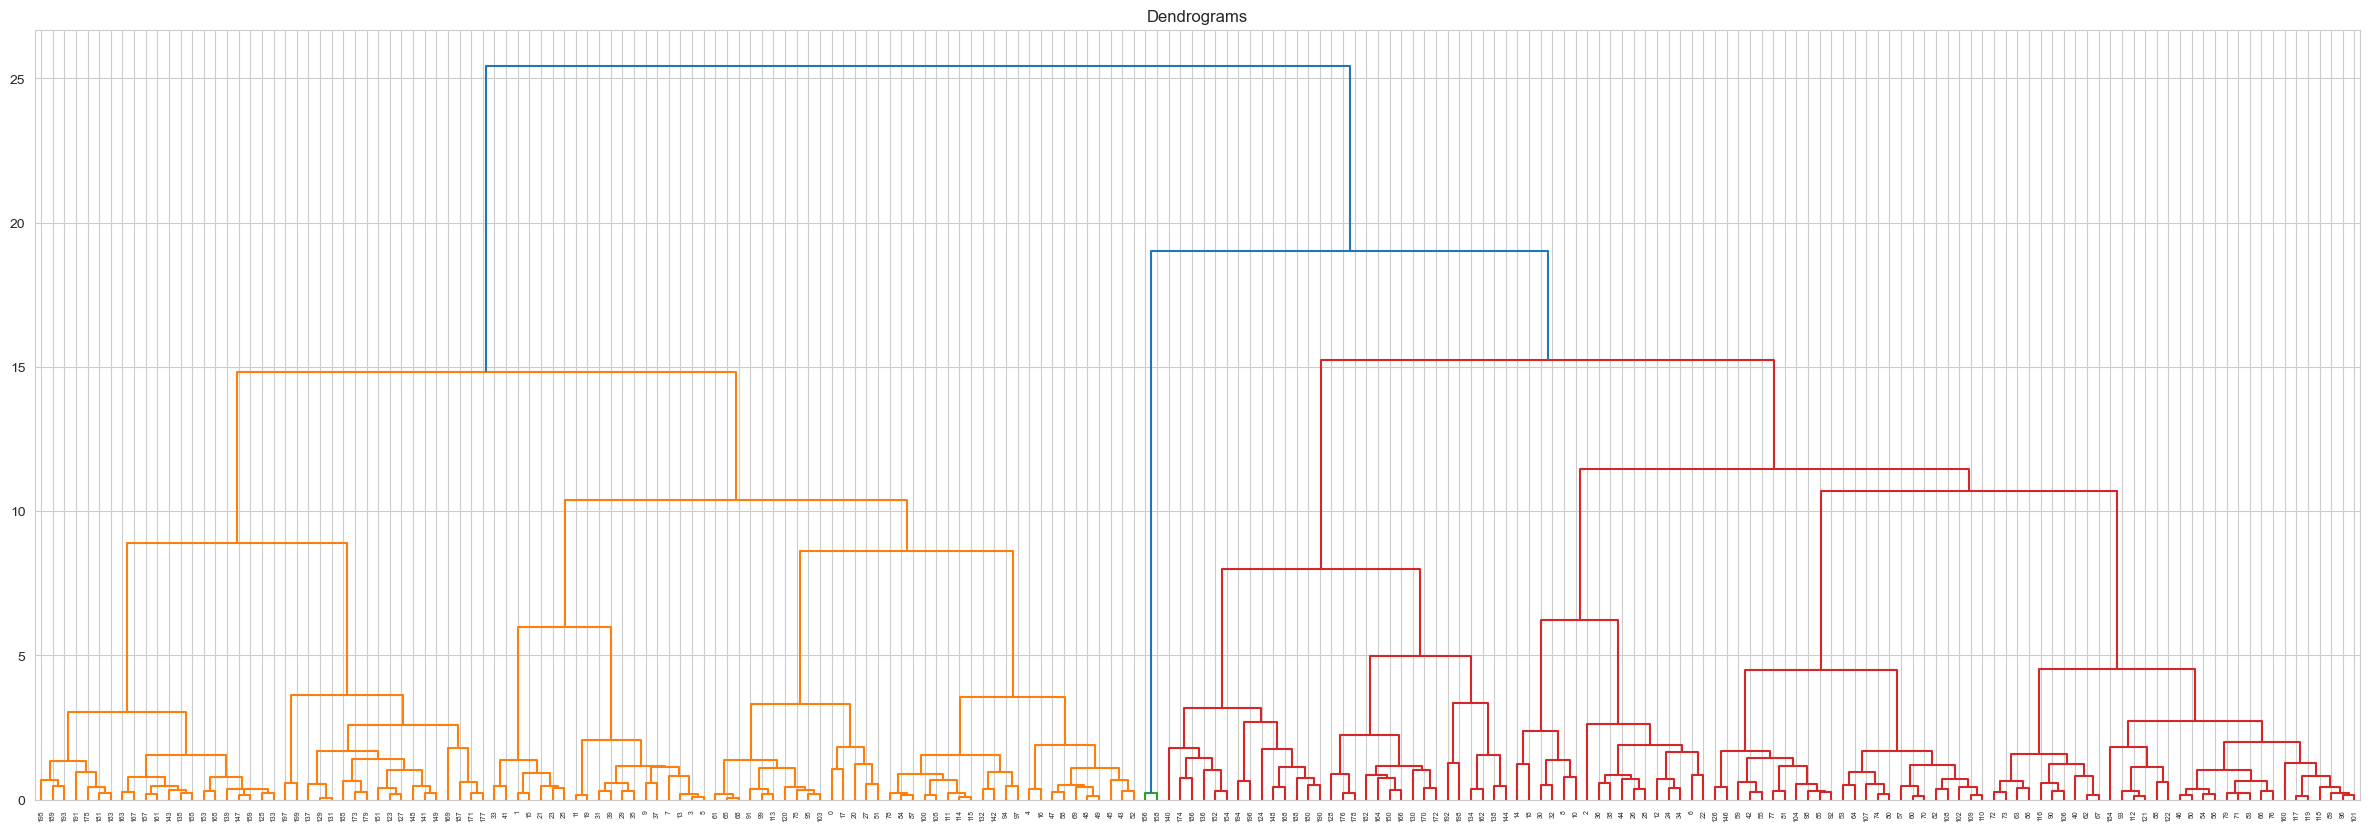

In [186]:
plt.figure(figsize=(30, 10))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [196]:
cluster = AgglomerativeClustering(n_clusters=3, linkage='complete', metric='manhattan')

In [198]:
cluster

AgglomerativeClustering(linkage='complete', metric='manhattan', n_clusters=3)

In [200]:
cluster.n_clusters

3

In [204]:
cluster.fit(X) 
print(cluster.n_leaves_)

300


In [206]:
labels = cluster.fit_predict(df)

In [208]:
df['Cluster'] = labels
print(df.head())

   Gender  Age  Annual_Income  SpendingScore  Purchasing_Power_Index  \
0       1   19             15             39              288.781316   
1       1   21             15             81              288.781316   
2       0   20             16              6              288.781316   
3       0   23             16             77              288.781316   
4       0   31             17             40              288.781316   

   Income_per_SpendingPoint  Spending_Category_Ordinal  Cluster  
0                  0.384615                        1.0        1  
1                  0.185185                        2.0        1  
2                  2.666667                        0.0        1  
3                  0.207792                        2.0        1  
4                  0.425000                        1.0        1  


In [210]:
cluster.children_

array([[ 65,  68],
       [129, 131],
       [ 48,  49],
       [156, 158],
       [  3,   5],
       [100, 105],
       [106, 109],
       [114, 115],
       [147, 159],
       [ 92,  96],
       [ 60,  70],
       [ 16,  20],
       [ 13,  15],
       [133, 137],
       [ 11,  19],
       [ 83,  85],
       [101, 209],
       [117, 119],
       [110, 206],
       [112, 121],
       [150, 152],
       [181, 183],
       [ 75,  78],
       [ 95,  97],
       [ 50,  56],
       [ 84,  87],
       [ 74,  80],
       [113, 207],
       [ 62,  67],
       [ 79, 215],
       [123, 127],
       [139, 213],
       [ 21,  23],
       [149, 151],
       [ 61, 200],
       [157, 208],
       [135, 143],
       [ 26,  28],
       [ 43,  51],
       [103, 120],
       [ 72,  73],
       [176, 178],
       [154, 220],
       [187, 191],
       [ 89, 216],
       [167, 173],
       [ 54,  59],
       [204, 212],
       [108, 116],
       [141, 163],
       [104, 217],
       [ 99, 227],
       [171,

### DBSCAN

In [231]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [237]:
num_cols = ['Age', 'Annual_Income', 'SpendingScore', 'Income_per_SpendingPoint']

X_numerics = df[num_cols]

In [239]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

In [241]:
no_of_clusters

[16,
 10,
 7,
 8,
 6,
 5,
 4,
 14,
 10,
 8,
 8,
 7,
 5,
 4,
 12,
 10,
 8,
 8,
 7,
 6,
 4,
 11,
 7,
 6,
 7,
 6,
 6,
 4,
 12,
 7,
 6,
 7,
 6,
 6,
 5,
 12,
 7,
 6,
 7,
 7,
 7,
 7,
 11,
 7,
 7,
 5,
 6,
 5,
 6,
 11,
 6,
 6,
 4,
 6,
 5,
 6,
 11,
 6,
 5,
 4,
 6,
 5,
 6,
 11,
 6,
 5,
 5,
 5,
 5,
 6,
 11,
 6,
 6,
 5,
 6,
 5,
 5,
 11,
 6,
 6,
 5,
 6,
 5,
 5,
 10,
 5,
 6,
 5,
 6,
 5,
 5,
 10,
 5,
 6,
 5,
 6,
 4,
 5,
 9,
 5,
 6,
 5,
 5,
 4,
 4,
 8,
 5,
 5,
 5,
 5,
 5,
 4,
 8,
 5,
 5,
 4,
 5,
 5,
 4,
 7,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 6,
 4,
 4,
 4,
 4,
 4]

In [243]:
sil_score

[0.021327251285295095,
 -0.023329944386463675,
 0.0034252157526925855,
 -0.04162183912154353,
 -0.13037984566601948,
 -0.166551462506905,
 -0.23241322155093214,
 0.09403402854682419,
 0.05604401995053095,
 -0.0019434096210417095,
 -0.014688116405018157,
 -0.08196772214373435,
 -0.15408977666693838,
 -0.2222607781606436,
 0.08246547909145115,
 0.03729140711983605,
 0.008625546835490413,
 -0.006600309331398656,
 -0.06116981568118739,
 -0.11750473750091535,
 -0.2110774468600295,
 0.08834360612592997,
 0.06787371283284824,
 0.071959409783237,
 -0.009566679342246342,
 0.005217324224389103,
 -0.0929519607518288,
 -0.19363736909428145,
 0.10927088066983977,
 0.06787371283284824,
 0.071959409783237,
 0.008713577435947672,
 0.011257227032152185,
 -0.07834183247061485,
 -0.15572495955066437,
 0.1567776581224437,
 0.10127516152355177,
 0.10004825452466952,
 0.031886531029667056,
 0.011291785674058108,
 -0.027144504465246126,
 -0.08780859026655513,
 0.15643452615101236,
 0.05845727055367646,
 0.01

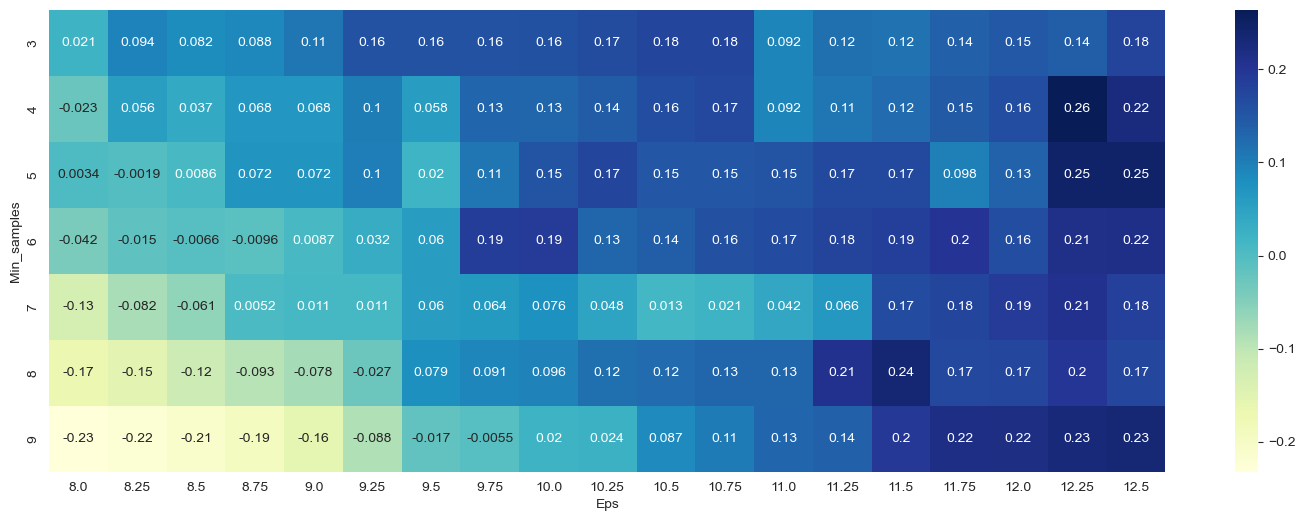

In [245]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [247]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [249]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1                24
 0               112
 1                 6
 2                34
 3                20
 4                 4

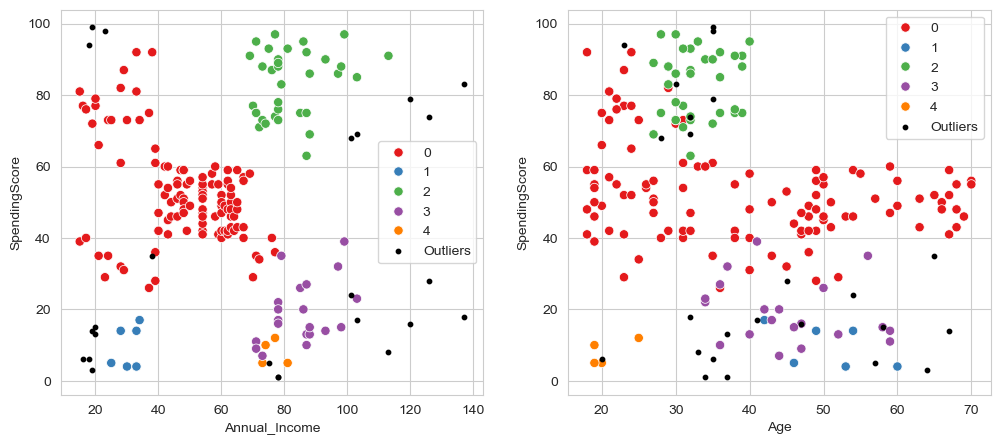

In [255]:
# Make sure your DataFrame has these columns:
# 'Annual_Income', 'SpendingScore', 'Age', and 'Cluster'

# Select outliers labeled as -1 by DBSCAN
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster'] == -1]

fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot clusters without outliers - first subplot
sns.scatterplot(x='Annual_Income', y='SpendingScore',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

# Plot clusters without outliers - second subplot
sns.scatterplot(x='Age', y='SpendingScore',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                hue='Cluster', ax=axes[1], palette='Set1', legend='full', s=45)

# Plot outliers on top in black
axes[0].scatter(outliers['Annual_Income'], outliers['SpendingScore'], s=10, label='Outliers', c='k')
axes[1].scatter(outliers['Age'], outliers['SpendingScore'], s=10, label='Outliers', c='k')

axes[0].legend()
axes[1].legend()

# Adjust legend text size
plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

In [259]:
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))
    
af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

preference  clusters  sil_score
111     -8900.0       7.0    0.45479
125     -7500.0       7.0    0.45479
108     -9200.0       7.0    0.45479
129     -7100.0       7.0    0.45479
126     -7400.0       7.0    0.45479

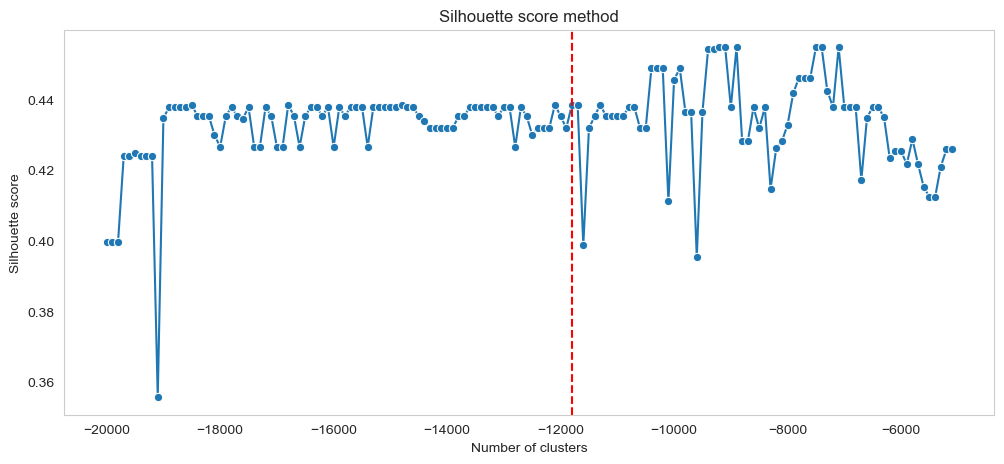

In [263]:
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(x=preferences, y=af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

## AffinityPropagation mode

In [265]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [267]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [269]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

AF_size
Cluster         
0             22
1             22
2             44
3             39
4             34
5             39

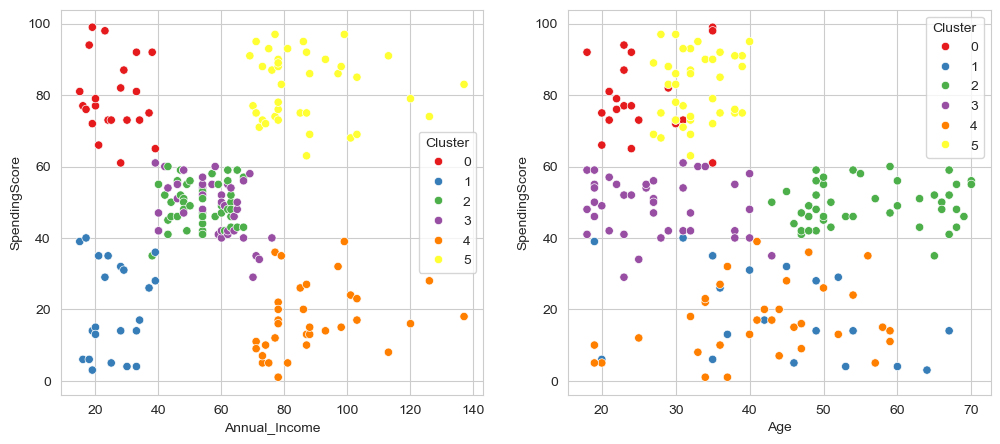

In [277]:
fig3, ax_af = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x='Annual_Income', y='SpendingScore', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='SpendingScore', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')

plt.show()